In [2]:
import argparse
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pprint
import pyspark
import pyspark.sql.functions as F
from scipy.stats import chi2_contingency
import seaborn as sns

from pyspark.sql.functions import col, lit, sqrt, pow, when, regexp_extract, mean, col, array_contains
from pyspark.sql.types import StringType, IntegerType, FloatType, DateType, NumericType

import utils.data_processing_bronze_table
import utils.data_processing_silver_table
import utils.data_processing_gold_table

# Creating Bronze table

In [3]:
spark = pyspark.sql.SparkSession.builder \
        .appName("dev") \
        .master("local[*]") \
        .getOrCreate()
    
# Set log level to ERROR to hide warnings
spark.sparkContext.setLogLevel("ERROR")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/22 09:43:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# set up config
snapshot_date_str = "2023-01-01"

start_date_str = "2023-01-01"
end_date_str = "2024-12-01"

In [5]:
# generate list of dates to process
def generate_first_of_month_dates(start_date_str, end_date_str):
    # Convert the date strings to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    
    # List to store the first of month dates
    first_of_month_dates = []

    # Start from the first of the month of the start_date
    current_date = datetime(start_date.year, start_date.month, 1)

    while current_date <= end_date:
        # Append the date in yyyy-mm-dd format
        first_of_month_dates.append(current_date.strftime("%Y-%m-%d"))
        
        # Move to the first of the next month
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)

    return first_of_month_dates

dates_str_lst = generate_first_of_month_dates(start_date_str, end_date_str)
dates_str_lst

['2023-01-01',
 '2023-02-01',
 '2023-03-01',
 '2023-04-01',
 '2023-05-01',
 '2023-06-01',
 '2023-07-01',
 '2023-08-01',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01',
 '2024-01-01',
 '2024-02-01',
 '2024-03-01',
 '2024-04-01',
 '2024-05-01',
 '2024-06-01',
 '2024-07-01',
 '2024-08-01',
 '2024-09-01',
 '2024-10-01',
 '2024-11-01',
 '2024-12-01']

In [7]:
# create bronze datalake
bronze_feat_clickstream_directory = "datamart/bronze/clickstream/"
bronze_feat_attributes_directory = "datamart/bronze/feat_attributes/"
bronze_feat_financial_directory = "datamart/bronze/feat_financial/"

In [6]:
# bronze_feat_clickstream_directory = "datamart/bronze/clickstream/"

if not os.path.exists(bronze_feat_clickstream_directory):
    os.makedirs(bronze_feat_clicksteam_directory)

# run data processing
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table_feat_clickstream(date_str, bronze_feat_clickstream_directory, spark)

print('\n\n---completed job for feat clickstream bronze table---\n\n')


2023-01-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_01_01.csv


2023-02-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_02_01.csv
2023-03-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_03_01.csv
2023-04-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_04_01.csv
2023-05-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_05_01.csv
2023-06-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_06_01.csv
2023-07-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_07_01.csv
2023-08-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_08_01.csv
2023-09-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_09_01.csv
2023-10-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_10_01.csv
2023-11-01 row count: 8974
Saved to: datamart/bronze/clickstream

In [ ]:
if not os.path.exists(bronze_feat_attributes_directory):
    os.makedirs(bronze_feat_attributes_directory)

for date_str in dates_str_lst:
    utils.data_processing_bronze_table.pracocess_bronze_table_feat_attributes(date_str, bronze_feat_attributes_directory, spark)

print('\n\n---completed job for feat attribute bronze table---\n\n')

2023-01-01row count: 530
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_01_01.csv
2023-02-01row count: 501
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_02_01.csv
2023-03-01row count: 506
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_03_01.csv
2023-04-01row count: 510
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_04_01.csv
2023-05-01row count: 521
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_05_01.csv
2023-06-01row count: 517
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_06_01.csv
2023-07-01row count: 471
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_07_01.csv
2023-08-01row count: 481
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_08_01.csv
2023-09-01row count: 454
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_09_01.csv
2023-10-01row count: 487
saved to: datamart/bronze/feat_attribut

In [8]:
bronze_feat_financial_directory = "datamart/bronze/feat_financial/"

if not os.path.exists(bronze_feat_financial_directory):
    os.makedirs(bronze_feat_financial_directory)

for date_str in dates_str_lst:
 utils.data_processing_bronze_table.process_bronze_table_feat_financial(date_str, bronze_feat_financial_directory, spark)

print('\n\n---completed job for feat financial bronze table---\n\n')

# spark.stop()

2023-01-01 row count: 530
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_01_01.csv
2023-02-01 row count: 501
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_02_01.csv
2023-03-01 row count: 506
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_03_01.csv
2023-04-01 row count: 510
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_04_01.csv
2023-05-01 row count: 521
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_05_01.csv
2023-06-01 row count: 517
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_06_01.csv
2023-07-01 row count: 471
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_07_01.csv
2023-08-01 row count: 481
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_08_01.csv
2023-09-01 row count: 454
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_09_01.csv
2023-10-01 row count: 487
Saved to: datamart/bronze/feat_financi

# Creating Silver table 

In [9]:
# Load Bronze Clickstream Table
bronze_clickstream_df = spark.read.csv("datamart/bronze/clickstream/", header=True, inferSchema=True)

# Load Bronze Feature Attributes Table
bronze_feat_attributes_df = spark.read.csv("datamart/bronze/feat_attributes/", header=True, inferSchema=True)

# Load Bronze Financial Features Table
bronze_feat_financial_df = spark.read.csv("datamart/bronze/feat_financial/", header=True, inferSchema=True)

# Convert to Pandas DataFrame if needed
bronze_clickstream_pd = bronze_clickstream_df.toPandas()
bronze_feat_attributes_pd = bronze_feat_attributes_df.toPandas()
bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()


### Clickstream dataset

In [10]:
# view DataFrame
bronze_clickstream_df.printSchema()

print(bronze_clickstream_pd.head())  

root
 |-- fe_1: integer (nullable = true)
 |-- fe_2: integer (nullable = true)
 |-- fe_3: integer (nullable = true)
 |-- fe_4: integer (nullable = true)
 |-- fe_5: integer (nullable = true)
 |-- fe_6: integer (nullable = true)
 |-- fe_7: integer (nullable = true)
 |-- fe_8: integer (nullable = true)
 |-- fe_9: integer (nullable = true)
 |-- fe_10: integer (nullable = true)
 |-- fe_11: integer (nullable = true)
 |-- fe_12: integer (nullable = true)
 |-- fe_13: integer (nullable = true)
 |-- fe_14: integer (nullable = true)
 |-- fe_15: integer (nullable = true)
 |-- fe_16: integer (nullable = true)
 |-- fe_17: integer (nullable = true)
 |-- fe_18: integer (nullable = true)
 |-- fe_19: integer (nullable = true)
 |-- fe_20: integer (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- snapshot_date: date (nullable = true)

   fe_1  fe_2  fe_3  fe_4  fe_5  fe_6  fe_7  fe_8  fe_9  fe_10  ...  fe_13  \
0    71   243    89   149   202    56   149   207   232    111  ...    -17   
1

In [11]:
print("Clicksteream column describe: ")
print(bronze_clickstream_pd.describe())

print(" \n Attributes column describe: ")
print(bronze_feat_attributes_pd.describe())

print(" \n Finaical column describe: ")
print(bronze_feat_financial_pd.describe())

Clicksteream column describe: 
                fe_1           fe_2           fe_3           fe_4  \
count  215376.000000  215376.000000  215376.000000  215376.000000   
mean      101.414796     103.096195     104.333709     105.648503   
std        99.833594      99.930002     100.599865     100.326065   
min      -378.000000    -356.000000    -399.000000    -307.000000   
25%        34.000000      36.000000      36.000000      38.000000   
50%       102.000000     103.000000     104.000000     106.000000   
75%       169.000000     171.000000     172.000000     173.000000   
max       541.000000     560.000000     583.000000     562.000000   

                fe_5           fe_6           fe_7           fe_8  \
count  215376.000000  215376.000000  215376.000000  215376.000000   
mean      106.996676     103.235922     107.070337     110.718724   
std       100.693607     100.270388     100.323265     100.243698   
min      -343.000000    -321.000000    -368.000000    -361.000000   
25

In [12]:
print("Clicksteream column info: ")
print(bronze_clickstream_pd.info())


Clicksteream column info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215376 entries, 0 to 215375
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   fe_1           215376 non-null  int32 
 1   fe_2           215376 non-null  int32 
 2   fe_3           215376 non-null  int32 
 3   fe_4           215376 non-null  int32 
 4   fe_5           215376 non-null  int32 
 5   fe_6           215376 non-null  int32 
 6   fe_7           215376 non-null  int32 
 7   fe_8           215376 non-null  int32 
 8   fe_9           215376 non-null  int32 
 9   fe_10          215376 non-null  int32 
 10  fe_11          215376 non-null  int32 
 11  fe_12          215376 non-null  int32 
 12  fe_13          215376 non-null  int32 
 13  fe_14          215376 non-null  int32 
 14  fe_15          215376 non-null  int32 
 15  fe_16          215376 non-null  int32 
 16  fe_17          215376 non-null  int32 
 17  fe_18          215376

In [13]:
print("Clicksteream column check: ")
print(bronze_clickstream_pd.isna().sum())

Clicksteream column check: 
fe_1             0
fe_2             0
fe_3             0
fe_4             0
fe_5             0
fe_6             0
fe_7             0
fe_8             0
fe_9             0
fe_10            0
fe_11            0
fe_12            0
fe_13            0
fe_14            0
fe_15            0
fe_16            0
fe_17            0
fe_18            0
fe_19            0
fe_20            0
Customer_ID      0
snapshot_date    0
dtype: int64


#### Insights and Assumption
* all clickstream from the first time they sign up for loans until the next 20 months
* each feature represent each month
* clicks can be negative as it might be the coordinates
* Each user has clickstream

## Attributes Dataset

In [14]:
bronze_feat_attributes_df.printSchema()

print(bronze_feat_attributes_pd.head(5))

root
 |-- Customer_ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SSN: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- snapshot_date: date (nullable = true)

  Customer_ID         Name  Age          SSN    Occupation snapshot_date
0  CUS_0x10ac        Zhouy   29  780-50-4730     Developer    2024-08-01
1  CUS_0x10c5        Moony   24  041-74-6785       _______    2024-08-01
2  CUS_0x1145  Blenkinsopr   24  426-31-9194       Teacher    2024-08-01
3  CUS_0x11ac    Liana B.v  26_  835-92-7751    Journalist    2024-08-01
4  CUS_0x122c   Papadimasf   48  883-73-9594  Entrepreneur    2024-08-01


In [15]:
print(" \n Attributes column info: ")
print(bronze_feat_attributes_pd.info())

 
 Attributes column info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    12500 non-null  object
 1   Name           12500 non-null  object
 2   Age            12500 non-null  object
 3   SSN            12500 non-null  object
 4   Occupation     12500 non-null  object
 5   snapshot_date  12500 non-null  object
dtypes: object(6)
memory usage: 586.1+ KB
None


In [16]:
print(" \n Attributes column check: ")
print(bronze_feat_attributes_pd.isna().sum())

 
 Attributes column check: 
Customer_ID      0
Name             0
Age              0
SSN              0
Occupation       0
snapshot_date    0
dtype: int64


In [17]:
bronze_feat_attributes_df.describe().show()

# Total rows
total_rows = bronze_feat_attributes_df.count()

# Unique customers
unique_customers = bronze_feat_attributes_df.select("Customer_ID").distinct().count()

print(f"Total rows: {total_rows}")
print(f"Unique customers: {unique_customers}")

# Check for duplicate customers
duplicate_customers = total_rows - unique_customers
print(f"Duplicate customers: {duplicate_customers}")

+-------+-----------+------+------------------+-----------+----------+
|summary|Customer_ID|  Name|               Age|        SSN|Occupation|
+-------+-----------+------+------------------+-----------+----------+
|  count|      12500| 12500|             12500|      12500|     12500|
|   mean|       NULL|  NULL|104.40925566888646|       NULL|      NULL|
| stddev|       NULL|  NULL| 659.4794049008866|       NULL|      NULL|
|    min| CUS_0x1000| Mattr|              -500|  #F%$D@*&8|Accountant|
|    max|  CUS_0xffd|    yv|               925|999-99-3421|   _______|
+-------+-----------+------+------------------+-----------+----------+



[Stage 306:==================>                                    (6 + 12) / 18]

Total rows: 12500
Unique customers: 12500
Duplicate customers: 0


#### Insight
* mean and std seems to have outliers as there are age that goes below 0 and above 100
* SSN contians not SSN values
* SOme occupations consist of "______"

## Financial attribute

In [18]:
bronze_feat_financial_df.printSchema()

print(bronze_feat_financial_pd.head())

root
 |-- Customer_ID: string (nullable = true)
 |-- Annual_Income: string (nullable = true)
 |-- Monthly_Inhand_Salary: double (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: string (nullable = true)
 |-- Type_of_Loan: string (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: string (nullable = true)
 |-- Changed_Credit_Limit: string (nullable = true)
 |-- Num_Credit_Inquiries: double (nullable = true)
 |-- Credit_Mix: string (nullable = true)
 |-- Outstanding_Debt: string (nullable = true)
 |-- Credit_Utilization_Ratio: double (nullable = true)
 |-- Credit_History_Age: string (nullable = true)
 |-- Payment_of_Min_Amount: string (nullable = true)
 |-- Total_EMI_per_month: double (nullable = true)
 |-- Amount_invested_monthly: string (nullable = true)
 |-- Payment_Behaviour: string (nullable = true)
 |-- Mont

In [19]:
from pyspark.sql.functions import col, to_date

columns_to_cast = [
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Outstanding_Debt",
    "Monthly_Balance",
    "Annual_Income",
]

columns_to_float = ["Outstanding_Debt", 'Amount_invested_monthly', 'Changed_Credit_Limit']

for column in columns_to_cast:
    bronze_feat_financial_df = bronze_feat_financial_df.withColumn(column, col(column).cast("int"))

for column in columns_to_float:
    bronze_feat_financial_df = bronze_feat_financial_df.withColumn(column, col(column).cast("float"))

# Verify the changes
bronze_feat_financial_df.printSchema()

bronze_feat_financial_pd =bronze_feat_financial_df.toPandas()


bronze_feat_financial_pd.head(5)

root
 |-- Customer_ID: string (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Monthly_Inhand_Salary: double (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: integer (nullable = true)
 |-- Type_of_Loan: string (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: integer (nullable = true)
 |-- Changed_Credit_Limit: float (nullable = true)
 |-- Num_Credit_Inquiries: double (nullable = true)
 |-- Credit_Mix: string (nullable = true)
 |-- Outstanding_Debt: float (nullable = true)
 |-- Credit_Utilization_Ratio: double (nullable = true)
 |-- Credit_History_Age: string (nullable = true)
 |-- Payment_of_Min_Amount: string (nullable = true)
 |-- Total_EMI_per_month: double (nullable = true)
 |-- Amount_invested_monthly: float (nullable = true)
 |-- Payment_Behaviour: string (nullable = true)
 |-- Mont

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x10ac,16718.0,1270.220417,7,3,15,4.0,"Credit-Builder Loan, Credit-Builder Loan, Home...",26,11.0,...,_,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319.0,2024-08-01
1,CUS_0x10c5,158623.0,13180.596667,2,7,10,1.0,Payday Loan,10,5.0,...,Good,1134.0,41.796800,30 Years and 2 Months,No,91.033905,282.718689,High_spent_Medium_value_payments,1194.0,2024-08-01
2,CUS_0x1145,17975.0,1444.943333,6,5,32,9.0,"Student Loan, Payday Loan, Not Specified, Mort...",61,25.0,...,Bad,1263.0,25.681798,12 Years and 5 Months,Yes,76.450325,176.776215,Low_spent_Small_value_payments,181.0,2024-08-01
3,CUS_0x11ac,69136.0,5902.378333,3,4,14,0.0,None,14,18.0,...,Standard,478.0,32.103164,17 Years and 5 Months,Yes,0.000000,435.937012,Low_spent_Small_value_payments,444.0,2024-08-01
4,CUS_0x122c,36346.0,3188.844167,8,6,11,3.0,"Credit-Builder Loan, Home Equity Loan, and Aut...",21,15.0,...,Good,1252.0,28.066704,22 Years and 2 Months,NM,89.061554,110.509705,High_spent_Medium_value_payments,369.0,2024-08-01


In [20]:
print(" \n Financial column check: ")
print(bronze_feat_financial_pd.isna().sum())

 
 Financial column check: 
Customer_ID                    0
Annual_Income                859
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                  623
Type_of_Loan                1426
Delay_from_due_date            0
Num_of_Delayed_Payment       374
Changed_Credit_Limit         254
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt             139
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      558
Payment_Behaviour              0
Monthly_Balance                1
snapshot_date                  0
dtype: int64


#### insight 
* Type of loans has quite high of NA values, can be investigated
* credit history rate can be transformed as number instead of string (total months/year)
* Payment behaviour can be cleaned (some has gibberish category such as "!@9#%8") and can be one hot encoded

______________________________________________________________________________________________________________________________

## Data cleaning 

1. Possible data cleaning and analysis

#### a. Data type
* Change attributes for attribute table (age from object to int, snapshot date from object to date)

#### b. Data cleaning:
* Financial table
    * Type of loan: analyze what is inside and might want to consider to drop if there is no pattern between data that has type of loan and not
    * credit mix: we can consider on transforming "_" to null or impute mean if we want to try around
    * Payment behaviour: replace groups like !@9#%8 

* Attribute table
    * Occupation: transform "_____" into null instead or try to impute them
      
#### c. Data preprocessing:
* Attribute table
    * Age: can consider dropping or impute with mean
    * SSN: we can consider dropping  together with other identification data 

### a. Data type 

In [21]:
from pyspark.sql.functions import col, to_date

# Transform Age column to integer
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "Age",
    col("Age").cast("int")
)

# Transform snapshot_date column to date
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "snapshot_date",
    to_date(col("snapshot_date"), "yyyy-MM-dd")
)

# Check the changes 
bronze_feat_attributes_df.printSchema()
bronze_feat_attributes_df.show(5)

root
 |-- Customer_ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- SSN: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- snapshot_date: date (nullable = true)

+-----------+-----------+----+-----------+------------+-------------+
|Customer_ID|       Name| Age|        SSN|  Occupation|snapshot_date|
+-----------+-----------+----+-----------+------------+-------------+
| CUS_0x10ac|      Zhouy|  29|780-50-4730|   Developer|   2024-08-01|
| CUS_0x10c5|      Moony|  24|041-74-6785|     _______|   2024-08-01|
| CUS_0x1145|Blenkinsopr|  24|426-31-9194|     Teacher|   2024-08-01|
| CUS_0x11ac|  Liana B.v|NULL|835-92-7751|  Journalist|   2024-08-01|
| CUS_0x122c| Papadimasf|  48|883-73-9594|Entrepreneur|   2024-08-01|
+-----------+-----------+----+-----------+------------+-------------+
only showing top 5 rows



### b. Data cleaning

* Financial table

    * Impute missing values (Annual_Income, Num_of_Loan, Type_of_Loan, Outstanding_Debt, Amount_invested_monthly)
    * Type of loan: analyze what is inside and might want to consider to drop if there is no pattern between data that has type of loan and not
    * credit mix: we can consider on transforming "_" to null or impute mean if we want to try around

* Attribute table
    * Clean occupation "______" and perform imputation


#### Financial table

In [22]:
# Check basic stats
bronze_feat_financial_df.select("Annual_Income", "Outstanding_Debt", "Amount_invested_monthly", "Num_of_Loan","Changed_Credit_Limit", "Num_of_Delayed_Payment",).describe().show()


+-------+------------------+------------------+-----------------------+-----------------+--------------------+----------------------+
|summary|     Annual_Income|  Outstanding_Debt|Amount_invested_monthly|      Num_of_Loan|Changed_Credit_Limit|Num_of_Delayed_Payment|
+-------+------------------+------------------+-----------------------+-----------------+--------------------+----------------------+
|  count|             11641|             12361|                  11942|            11877|               12246|                 12126|
|   mean|165301.64582080577| 1426.578108567268|     194.61439924251292|  2.8950071566894|  10.398582394069956|     33.22076529770741|
| stddev|1318317.7486939076|1155.3610618500063|     200.62557960533147|65.49885397088404|   6.799253017394344|     240.9501022068866|
|    min|              7005|               0.0|                    0.0|             -100|               -6.49|                    -3|
|    max|          23834698|            4998.0|               

1. Annual_Income: highly right skew
2. Outstanding_debt: moderate rigth
3. Amount_invested_monthly: slightly right skew
4. Num_of_Loan: extreme outliers (-100, 1495)
5. Changed_Credit_Limit: moderate skewed with some outliers
6. Num_of_Delayed_Payments: outliers with invalid payment method
7. Monthly balance: will be impute with mean as only 1 NA values

> Impute median for highly scewed data and impute mean for not too extreme data

In [23]:
from pyspark.sql.functions import when


# Replace negative values with null (so they can be imputed later)
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Num_of_Loan", when(col("Num_of_Loan") < 0, None).otherwise(col("Num_of_Loan"))
).withColumn(
    "Num_of_Delayed_Payment", when(col("Num_of_Delayed_Payment") < 0, None).otherwise(col("Num_of_Delayed_Payment"))
).withColumn(
    "Changed_Credit_Limit", when(col("Changed_Credit_Limit") < 0, None).otherwise(col("Changed_Credit_Limit")))



In [24]:
median_dict = {
    "Annual_Income": bronze_feat_financial_df.approxQuantile("Annual_Income", [0.5], 0.01)[0],
    "Outstanding_Debt": bronze_feat_financial_df.approxQuantile("Outstanding_Debt", [0.5], 0.01)[0],
    "Amount_invested_monthly": bronze_feat_financial_df.approxQuantile("Amount_invested_monthly", [0.5], 0.01)[0],
    "Num_of_Loan": bronze_feat_financial_df.approxQuantile("Num_of_Loan", [0.5], 0.01)[0],
    "Num_of_Delayed_Payment": bronze_feat_financial_df.approxQuantile("Num_of_Delayed_Payment", [0.5], 0.01)[0],
    "Changed_Credit_Limit": bronze_feat_financial_df.approxQuantile("Changed_Credit_Limit", [0.5], 0.01)[0]
}


In [25]:
bronze_feat_financial_df = bronze_feat_financial_df.fillna(median_dict)
bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()


In [26]:

monthly_balance_mean = bronze_feat_financial_df.select(mean(col("Monthly_Balance"))).collect()[0][0]
bronze_feat_financial_df = bronze_feat_financial_df.fillna({"Monthly_Balance": monthly_balance_mean})
bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()

In [27]:
print(" \n Financial column check: ")
print(bronze_feat_financial_pd.isna().sum())

 
 Financial column check: 
Customer_ID                    0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                1426
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
snapshot_date                  0
dtype: int64


##### Type of Loan

In [28]:
# Check the distinct values in the Type_of_Loan column
bronze_feat_financial_df.select("Type_of_Loan").distinct().show(truncate=False)

# Count the occurrences of each value in the Type_of_Loan column
bronze_feat_financial_df.groupBy("Type_of_Loan").count().orderBy("count", ascending=False).show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Type_of_Loan                                                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Personal Loan, Personal Loan, Credit-Builder Loan, Student Loan, and Auto Loan                                                                               |
|Credit-Builder Loan, Student Loan, Home Equity Loan, Debt Consolidation Loan, Not Specified, Not Specified, Home Equity Loan, Student Loan, and Personal Loan|
|Debt Consolidation Loan, Debt Consolidation Loan, Personal Loan, Payday Loan, and Not Specified                                                              |
|Credit-Builder Loan, Debt Consolidation

In [29]:
from pyspark.sql.functions import col, lit, when, regexp_replace, split, count, trim, explode

# Step 1: Fill nulls with "Not Specified"
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Type_of_Loan",
    when(col("Type_of_Loan").isNull(), "Not Specified").otherwise(col("Type_of_Loan"))
)

# Step 2: Replace " and " with ", "
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Type_of_Loan", regexp_replace(col("Type_of_Loan"), r"\s+and\s+", ", ")
)

# Step 3: Remove multiple commas or trailing commas
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Type_of_Loan", regexp_replace(col("Type_of_Loan"), r",\s*,", ",")
)
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Type_of_Loan", regexp_replace(col("Type_of_Loan"), r",\s*$", "")
)

# Step 4: Split into array of loan types
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Type_of_Loan_Array", split(col("Type_of_Loan"), ",\s*")
)

bronze_feat_financial_df = bronze_feat_financial_df.drop("Type_of_Loan")


# Explode the array into individual rows for count purposes 
loan_type_counts = bronze_feat_financial_df.withColumn(
    "Individual_Loan_Type", explode(col("Type_of_Loan_Array"))
)
# Group by the individual loan type and count
loan_type_counts = loan_type_counts.groupBy("Individual_Loan_Type").count().orderBy("count", ascending=False)

# Show results
loan_type_counts.show(truncate=False)


bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()
bronze_feat_financial_pd.head(5)

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_673/1102876603.py:24: SyntaxWarning: invalid escape sequence '\s'
  "Type_of_Loan_Array", split(col("Type_of_Loan"), ",\s*")


+-----------------------+-----+
|Individual_Loan_Type   |count|
+-----------------------+-----+
|Not Specified          |6378 |
|Payday Loan            |5071 |
|Credit-Builder Loan    |5055 |
|Home Equity Loan       |4888 |
|Student Loan           |4871 |
|Mortgage Loan          |4867 |
|Personal Loan          |4861 |
|Debt Consolidation Loan|4847 |
|Auto Loan              |4749 |
+-----------------------+-----+



,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date,Type_of_Loan_Array
0,CUS_0x10ac,16718,1270.220417,7,3,15,4,26,11,18.450001,...,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319,2024-08-01,"[Credit-Builder Loan, Credit-Builder Loan, Hom..."
1,CUS_0x10c5,158623,13180.596667,2,7,10,1,10,5,6.040000,...,1134.0,41.796800,30 Years and 2 Months,No,91.033905,282.718689,High_spent_Medium_value_payments,1194,2024-08-01,[Payday Loan]
2,CUS_0x1145,17975,1444.943333,6,5,32,9,61,25,8.900000,...,1263.0,25.681798,12 Years and 5 Months,Yes,76.450325,176.776215,Low_spent_Small_value_payments,181,2024-08-01,"[Student Loan, Payday Loan, Not Specified, Mor..."
3,CUS_0x11ac,69136,5902.378333,3,4,14,0,14,18,7.180000,...,478.0,32.103164,17 Years and 5 Months,Yes,0.000000,435.937012,Low_spent_Small_value_payments,444,2024-08-01,[Not Specified]
4,CUS_0x122c,36346,3188.844167,8,6,11,3,21,15,10.540000,...,1252.0,28.066704,22 Years and 2 Months,NM,89.061554,110.509705,High_spent_Medium_value_payments,369,2024-08-01,"[Credit-Builder Loan, Home Equity Loan, Auto L..."


##### Insight
We currently will keep the array to do one hot encoding later on gold table 

#### Credit mix

In [30]:
# Check the distinct values in the credit mix column
bronze_feat_financial_df.select("credit_mix").distinct().show(truncate=False)

# Count the occurrences of each value in the credit mix column
credit_mix_counts = bronze_feat_financial_df.groupBy("credit_mix").count().orderBy("count", ascending=False)
credit_mix_counts.show(truncate=False)

+----------+
|credit_mix|
+----------+
|_         |
|Good      |
|Bad       |
|Standard  |
+----------+

+----------+-----+
|credit_mix|count|
+----------+-----+
|Standard  |4497 |
|Good      |3032 |
|_         |2611 |
|Bad       |2360 |
+----------+-----+



##### Insight

Will not use mean to impute the credit mix as it might skew the whole distribution to majority bad with assumption. so we will create another column instead called Unknown instead of assuming that this belong to majority group. We will also one hot encode it

In [31]:
from pyspark.sql.functions import when, col

# Replace "_" with "Unknown"
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "credit_mix",
    when(col("credit_mix") == "_", "Unknown").otherwise(col("credit_mix"))
)

credit_mix_counts = bronze_feat_financial_df.groupBy("credit_mix").count().orderBy("count", ascending=False)
credit_mix_counts.show(truncate=False)

+----------+-----+
|credit_mix|count|
+----------+-----+
|Standard  |4497 |
|Good      |3032 |
|Unknown   |2611 |
|Bad       |2360 |
+----------+-----+



In [32]:
bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()
bronze_feat_financial_pd['credit_mix'].head(20)

0      Unknown
1         Good
2          Bad
3     Standard
4         Good
5     Standard
6          Bad
7     Standard
8      Unknown
9          Bad
10     Unknown
11        Good
12        Good
13        Good
14    Standard
15         Bad
16    Standard
17    Standard
18     Unknown
19    Standard
Name: credit_mix, dtype: object

##### Payment Behaviour 

In [33]:
# Check the distinct values in the credit mix column
bronze_feat_financial_df.select("Payment_Behaviour").distinct().show(truncate=False)

# Count the occurrences of each value in the credit mix column
payment_behaviour_counts = bronze_feat_financial_df.groupBy("Payment_Behaviour").count().orderBy("count", ascending=False)
payment_behaviour_counts.show()

+--------------------------------+
|Payment_Behaviour               |
+--------------------------------+
|Low_spent_Small_value_payments  |
|High_spent_Medium_value_payments|
|High_spent_Small_value_payments |
|Low_spent_Large_value_payments  |
|Low_spent_Medium_value_payments |
|High_spent_Large_value_payments |
|!@9#%8                          |
+--------------------------------+

+--------------------+-----+
|   Payment_Behaviour|count|
+--------------------+-----+
|Low_spent_Small_v...| 3202|
|High_spent_Medium...| 2242|
|Low_spent_Medium_...| 1686|
|High_spent_Large_...| 1683|
|High_spent_Small_...| 1389|
|Low_spent_Large_v...| 1300|
|              !@9#%8|  998|
+--------------------+-----+



In [34]:
# Replace invalid Payment_Behaviour values with "Unknown"
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Payment_Behaviour",
    F.when(F.col("Payment_Behaviour").rlike(r"^[a-zA-Z_]+$"), F.col("Payment_Behaviour")).otherwise("Unknown")
)

payment_behaviour_counts = bronze_feat_financial_df.groupBy("Payment_Behaviour").count().orderBy("count", ascending=False)
payment_behaviour_counts.show()

+--------------------+-----+
|   Payment_Behaviour|count|
+--------------------+-----+
|Low_spent_Small_v...| 3202|
|High_spent_Medium...| 2242|
|Low_spent_Medium_...| 1686|
|High_spent_Large_...| 1683|
|High_spent_Small_...| 1389|
|Low_spent_Large_v...| 1300|
|             Unknown|  998|
+--------------------+-----+



In [35]:
bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()
bronze_feat_financial_pd['Payment_Behaviour'].head(10)

0                             Unknown
1    High_spent_Medium_value_payments
2      Low_spent_Small_value_payments
3      Low_spent_Small_value_payments
4    High_spent_Medium_value_payments
5      Low_spent_Small_value_payments
6      Low_spent_Large_value_payments
7                             Unknown
8      Low_spent_Small_value_payments
9    High_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

##### Credit History Age years attribute

In [36]:
from pyspark.sql.functions import when, regexp_extract

bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Credit_History_Age_Years",
    (
        regexp_extract(col("Credit_History_Age"), r"(\d+)\s+Years", 1).cast("int") +  # Extract years
        (regexp_extract(col("Credit_History_Age"), r"(\d+)\s+Months", 1).cast("int") / 12)  # Extract months and convert to years
    )
)

bronze_feat_financial_df = bronze_feat_financial_df.drop("Credit_History_Age")

# Show the result to verify
bronze_feat_financial_df.show(5)

+-----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+---------------------+-------------------+-----------------------+--------------------+---------------+-------------+--------------------+------------------------+
|Customer_ID|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|credit_mix|Outstanding_Debt|Credit_Utilization_Ratio|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|   Payment_Behaviour|Monthly_Balance|snapshot_date|  Type_of_Loan_Array|Credit_History_Age_Years|
+-----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+-----

#### Attribute table

In [37]:
# Replace "_______" in the occupation column with None
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "occupation",
    F.when(F.col("occupation") == "_______", None).otherwise(F.col("occupation"))
)

# Verify the changes
bronze_feat_attributes_df.select("occupation").distinct().show()

# Count NULL values in the occupation column
null_count = bronze_feat_attributes_df.filter(col("occupation").isNull()).count()

print(f"Number of NULL values in the occupation column: {null_count}")


+-------------+
|   occupation|
+-------------+
|    Scientist|
|Media_Manager|
|     Musician|
|       Lawyer|
|      Teacher|
|    Developer|
|       Writer|
|    Architect|
|     Mechanic|
| Entrepreneur|
|   Journalist|
|       Doctor|
|     Engineer|
|   Accountant|
|      Manager|
|         NULL|
+-------------+

Number of NULL values in the occupation column: 880


In [38]:
from pyspark.sql.functions import col, lit, sqrt, pow, avg

# Define numerical columns from the financial dataset
numerical_columns = [
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_Credit_Card",
    "Num_of_Loan",
    "Num_of_Delayed_Payment"
]

# Ensure numerical columns are cast to double in the financial dataset
for column in numerical_columns:
    bronze_feat_financial_df = bronze_feat_financial_df.withColumn(column, col(column).cast("double"))

# Join the financial and attributes datasets on Customer_ID
joined_df = bronze_feat_attributes_df.join(
    bronze_feat_financial_df.select("Customer_ID", *numerical_columns),
    on="Customer_ID",
    how="inner"
)

# Calculate mean values for each occupation
occupation_means = joined_df.groupBy("occupation").agg(
    *[avg(col_name).alias(f"mean_{col_name}") for col_name in numerical_columns]
)

# Extract the row for NULL occupation
null_means = occupation_means.filter(col("occupation").isNull()).collect()[0]

# Calculate Euclidean distance between NULL and other occupations
occupation_means = occupation_means.withColumn(
    "distance_from_null",
    sqrt(
        sum(
            pow(col(f"mean_{col_name}") - lit(null_means[f"mean_{col_name}"]), 2)
            for col_name in numerical_columns
        )
    )
)

# Order by distance to see how far each occupation is from NULL
occupation_distances = occupation_means.orderBy("distance_from_null")

# Show the distances
occupation_distances.select("occupation", "distance_from_null").show()

+-------------+------------------+
|   occupation|distance_from_null|
+-------------+------------------+
|         NULL|               0.0|
|      Teacher| 9712.818120308288|
|    Architect| 19951.71745267177|
|      Manager| 26370.51874269927|
|Media_Manager|29692.247194988733|
| Entrepreneur| 36891.58307347215|
|     Engineer| 41693.89404035713|
|    Scientist| 49624.34242160902|
|   Accountant|61727.891195400516|
|       Doctor| 64677.50633033392|
|       Lawyer| 67896.41947773263|
|       Writer| 71599.19949386615|
|     Musician| 95018.41734686506|
|    Developer|102115.05250399571|
|   Journalist|121405.26298091642|
|     Mechanic|121928.22891078079|
+-------------+------------------+



In [39]:
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "occupation",
    F.when(F.col("occupation").isNull(), 'Teacher').otherwise(F.col("occupation"))
)

bronze_feat_attributes_pd = bronze_feat_attributes_df.toPandas()
bronze_feat_attributes_pd.head(5)

,Customer_ID,Name,Age,SSN,occupation,snapshot_date
0,CUS_0x10ac,Zhouy,29.0,780-50-4730,Developer,2024-08-01
1,CUS_0x10c5,Moony,24.0,041-74-6785,Teacher,2024-08-01
2,CUS_0x1145,Blenkinsopr,24.0,426-31-9194,Teacher,2024-08-01
3,CUS_0x11ac,Liana B.v,NaN,835-92-7751,Journalist,2024-08-01
4,CUS_0x122c,Papadimasf,48.0,883-73-9594,Entrepreneur,2024-08-01


#### Insight:
* We are using Euclidean distance approach to try to see what occupation does this NULL group can belong to (to perform imputation) considering some of the financial issue
* Result: It appears that "teacher" is the closest one to Teacher

### c. Data preprocessing

In [40]:
# Create age bins
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "age_bin",
    F.when(F.col("Age") < 18, "Under 18")
    .when((F.col("Age") >= 18) & (F.col("Age") < 30), "18-29")
    .when((F.col("Age") >= 30) & (F.col("Age") < 50), "30-49")
    .when((F.col("Age") >= 50) & (F.col("Age") < 65), "50-64")
    .when(F.col("Age") >= 65, "65+")
    .otherwise("Unknown")
)

# Count users in each age bin
bronze_feat_attributes_df.groupBy("age_bin").count().orderBy("count", ascending=False).show()

+--------+-----+
| age_bin|count|
+--------+-----+
|   30-49| 6032|
|   18-29| 3880|
|   50-64| 1019|
|Under 18|  730|
| Unknown|  637|
|     65+|  202|
+--------+-----+



In [41]:
from pyspark.sql.functions import regexp_replace

# Remove underscores from the age column
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "Age",
    regexp_replace(F.col("Age"), "_", "")
)

# Verify the changes
bronze_feat_attributes_df.select("Customer_ID", "Age").show()

+-----------+----+
|Customer_ID| Age|
+-----------+----+
| CUS_0x10ac|  29|
| CUS_0x10c5|  24|
| CUS_0x1145|  24|
| CUS_0x11ac|NULL|
| CUS_0x122c|  48|
| CUS_0x1274|5656|
| CUS_0x1288|NULL|
| CUS_0x12cc|  30|
| CUS_0x1338|  40|
| CUS_0x1370|  32|
| CUS_0x1378|  15|
| CUS_0x139b|  46|
| CUS_0x13a9|  46|
| CUS_0x13ce|  52|
| CUS_0x147a|  20|
| CUS_0x1510|  27|
| CUS_0x1572|  39|
| CUS_0x159b|  35|
| CUS_0x15f1|  33|
| CUS_0x1621|  41|
+-----------+----+
only showing top 20 rows



In [42]:
# Create age bins
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "age_bin",
    F.when(F.col("Age") < 18, "Under 18")
    .when((F.col("Age") >= 18) & (F.col("Age") < 30), "18-29")
    .when((F.col("Age") >= 30) & (F.col("Age") < 50), "30-49")
    .when((F.col("Age") >= 50) & (F.col("Age") < 65), "50-64")
    .when(F.col("Age") >= 65, "65+")
    .otherwise("Unknown")
)

# Count users in each age bin
bronze_feat_attributes_df.groupBy("age_bin").count().orderBy("count", ascending=False).show()

+--------+-----+
| age_bin|count|
+--------+-----+
|   30-49| 6032|
|   18-29| 3880|
|   50-64| 1019|
|Under 18|  730|
| Unknown|  637|
|     65+|  202|
+--------+-----+



In [43]:
outlier_age_df = bronze_feat_attributes_df.filter((F.col("Age") > 100) | (F.col("Age") < 0))
outlier_age_df.select(*bronze_feat_attributes_df.columns).show()

print("Age:", outlier_age_df.count())

+-----------+-------------------+----+-----------+-------------+-------------+--------+
|Customer_ID|               Name| Age|        SSN|   occupation|snapshot_date| age_bin|
+-----------+-------------------+----+-----------+-------------+-------------+--------+
| CUS_0x1274|             Whited|5656|298-61-0480|    Scientist|   2024-08-01|     65+|
| CUS_0x2834|             Dennyd|3640|533-04-5976|    Scientist|   2024-08-01|     65+|
| CUS_0x3499|      Leigh Thomasv|1388|816-30-7776|    Architect|   2024-08-01|     65+|
| CUS_0x4ee5|   Erik Kirschbaumw|-500|009-33-0735|       Lawyer|   2024-08-01|Under 18|
| CUS_0x54bd|      Nick Edwardsv|2672|389-25-0255|   Journalist|   2024-08-01|     65+|
| CUS_0x682e|             Moiral|8125|130-71-2530|      Teacher|   2024-08-01|     65+|
| CUS_0x8062|           Andreasm|-500|  #F%$D@*&8|       Lawyer|   2024-08-01|Under 18|
|  CUS_0x815|           Raymondh|3441|307-66-3257|    Developer|   2024-08-01|     65+|
| CUS_0x8985|               Huwz

In [44]:
# Count outliers by snapshot_date
outliers_by_date = bronze_feat_attributes_df.filter((F.col("age") < 0) | (F.col("age") > 110) | (F.col("age").isNull())) \
    .groupBy("snapshot_date") \
    .count() \
    .orderBy("snapshot_date")

# Show the results
outliers_by_date.show()

+-------------+-----+
|snapshot_date|count|
+-------------+-----+
|   2023-01-01|   38|
|   2023-02-01|   32|
|   2023-03-01|   44|
|   2023-04-01|   51|
|   2023-05-01|   38|
|   2023-06-01|   42|
|   2023-07-01|   22|
|   2023-08-01|   40|
|   2023-09-01|   40|
|   2023-10-01|   35|
|   2023-11-01|   43|
|   2023-12-01|   31|
|   2024-01-01|   31|
|   2024-02-01|   38|
|   2024-03-01|   39|
|   2024-04-01|   42|
|   2024-05-01|   36|
|   2024-06-01|   43|
|   2024-07-01|   43|
|   2024-08-01|   36|
+-------------+-----+
only showing top 20 rows



### Insight
* Age currently will be impute with mean and will be analyze its significants on the gold table. if there is significants, we will keep it, otherwise we will drop it

In [45]:
from pyspark.sql.functions import col, mean, when, round

# Calculate the mean of valid age values (age >= 0 and age <= 120)
mean_age = bronze_feat_attributes_df.filter((col("Age") >= 0) & (col("Age") <= 120)) \
    .select(mean(col("Age")).cast("int").alias("mean_age")) \
    .collect()[0]["mean_age"]

# Replace invalid age values (age < 0, age > 120, or NULL) with the mean age
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "Age",
    when((col("Age") < 0) | (col("Age") > 110) | (col("Age").isNull()), mean_age).otherwise(col("Age").cast("int"))
)


print("Age mean:", mean_age)
# Verify the changes

bronze_feat_attributes_pd = bronze_feat_attributes_df.toPandas()
bronze_feat_attributes_pd.head(20)


Age mean: 33


,Customer_ID,Name,Age,SSN,occupation,snapshot_date,age_bin
0,CUS_0x10ac,Zhouy,29,780-50-4730,Developer,2024-08-01,18-29
1,CUS_0x10c5,Moony,24,041-74-6785,Teacher,2024-08-01,18-29
2,CUS_0x1145,Blenkinsopr,24,426-31-9194,Teacher,2024-08-01,18-29
3,CUS_0x11ac,Liana B.v,33,835-92-7751,Journalist,2024-08-01,Unknown
4,CUS_0x122c,Papadimasf,48,883-73-9594,Entrepreneur,2024-08-01,30-49
5,CUS_0x1274,Whited,33,298-61-0480,Scientist,2024-08-01,65+
6,CUS_0x1288,Taylorq,33,609-85-2725,Doctor,2024-08-01,Unknown
7,CUS_0x12cc,Lauren Tarat,30,761-36-5969,Developer,2024-08-01,30-49
8,CUS_0x1338,Olivia Orang,40,250-62-9181,Teacher,2024-08-01,30-49
9,CUS_0x1370,Rothackerb,32,710-06-0138,Writer,2024-08-01,30-49


In [46]:
# Check for invalid SSN values (empty or not matching the "000-00-0000" structure)
invalid_ssn_df = bronze_feat_attributes_df.filter(
    (F.col("SSN").isNull()) | 
    (~F.col("SSN").rlike(r"^\d{3}-\d{2}-\d{4}$"))
)

# Show invalid SSN values
invalid_ssn_df.select("SSN").show()

# Drop the SSN column
bronze_feat_attributes_df = bronze_feat_attributes_df.drop("SSN", "age_bin", 'Name')

# Verify the column is dropped
bronze_feat_attributes_df.printSchema()

+---------+
|      SSN|
+---------+
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
+---------+
only showing top 20 rows

root
 |-- Customer_ID: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- snapshot_date: date (nullable = true)



##### Clickstream attribute

In [47]:
bronze_clickstream_df.show(5)

+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----------+-------------+
|fe_1|fe_2|fe_3|fe_4|fe_5|fe_6|fe_7|fe_8|fe_9|fe_10|fe_11|fe_12|fe_13|fe_14|fe_15|fe_16|fe_17|fe_18|fe_19|fe_20|Customer_ID|snapshot_date|
+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----------+-------------+
|  71| 243|  89| 149| 202|  56| 149| 207| 232|  111|  179|  340|  -17|  100|  115|   68|   39|   87|  -74|  240| CUS_0x1037|   2024-03-01|
| -60|  65|  30| -56|  25| 206|  68| 157| -36|   81|   77|   66|  169|   98|   75|  268|   95|   19|  151|  234| CUS_0x1069|   2024-03-01|
|  50|  76| 115| 114| -57| 136|  33|  69| 175|   92|  218|  151|   30|  204|  268|  181|  333|   70|  190|   23| CUS_0x114a|   2024-03-01|
|   1| 245|  72| 247| 212|  80| 144| 138|   7|  -86|  284|   35|  -46|  159|   81|   58|  340|   38|   66|  -36| CUS_0x1184|   2024-03-01|
|   8| 138| 164| 147| 184| 

In [48]:
# Perform a left anti join to find users in clickstream but not in attributes
users_not_in_attributes_df = bronze_clickstream_df.join(
    bronze_feat_attributes_df.select("Customer_ID"), 
    on="Customer_ID", 
    how="left_anti"
)

# Count the number of users not in attributes
missing_users_count = users_not_in_attributes_df.count()

# Print the results
if missing_users_count == 0:
    print("All clickstream users exist in the attributes dataset.")
else:
    print(f"{missing_users_count} users in the clickstream dataset do not exist in the attributes dataset.")

# Optionally, show the Customer_IDs of users not in attributes
users_not_in_attributes_df.select("Customer_ID").show()

All clickstream users exist in the attributes dataset.
+-----------+
|Customer_ID|
+-----------+
+-----------+



In [49]:
# Check for duplicates in the clickstream dataset
duplicates_clickstream = bronze_clickstream_df.groupBy("Customer_ID").count().filter(F.col("count") > 1)
duplicates_count_clickstream = duplicates_clickstream.count()

print(f"Number of duplicated Customer_IDs in clickstream: {duplicates_count_clickstream}")
if duplicates_count_clickstream > 0:
    duplicates_clickstream.show()

# Check for duplicates in the attributes dataset
duplicates_attributes = bronze_feat_attributes_df.groupBy("Customer_ID").count().filter(F.col("count") > 1)
duplicates_count_attributes = duplicates_attributes.count()

print(f"Number of duplicated Customer_IDs in attributes: {duplicates_count_attributes}")
if duplicates_count_attributes > 0:
    duplicates_attributes.show()

# Check for duplicates in the financial dataset
duplicates_financial = bronze_feat_financial_df.groupBy("Customer_ID").count().filter(F.col("count") > 1)
duplicates_count_financial = duplicates_financial.count()

print(f"Number of duplicated Customer_IDs in financial: {duplicates_count_financial}")
if duplicates_count_financial > 0:
    duplicates_financial.show()

Number of duplicated Customer_IDs in clickstream: 8974
+-----------+-----+
|Customer_ID|count|
+-----------+-----+
| CUS_0x6ba9|   24|
| CUS_0x74c7|   24|
|  CUS_0xc65|   24|
| CUS_0x5a8b|   24|
| CUS_0x78d3|   24|
| CUS_0x7f5d|   24|
| CUS_0x8eb2|   24|
|  CUS_0xf6c|   24|
| CUS_0x7e24|   24|
| CUS_0xc65a|   24|
|  CUS_0xebe|   24|
| CUS_0x1ed5|   24|
| CUS_0x5479|   24|
| CUS_0x7e8d|   24|
| CUS_0xb38d|   24|
| CUS_0xafeb|   24|
| CUS_0x1b0f|   24|
| CUS_0x834f|   24|
| CUS_0x856b|   24|
| CUS_0x8d3d|   24|
+-----------+-----+
only showing top 20 rows

Number of duplicated Customer_IDs in attributes: 0
Number of duplicated Customer_IDs in financial: 0


In [50]:
# Get the list of duplicated Customer_IDs
duplicated_customer_ids = duplicates_clickstream.select("Customer_ID").rdd.flatMap(lambda x: x).collect()

# Filter the clickstream dataset for these duplicated Customer_IDs
duplicated_snapshots = bronze_clickstream_df.filter(F.col("Customer_ID").isin(duplicated_customer_ids))

# Show the snapshots for these users
duplicated_snapshots.select("Customer_ID", "snapshot_date").orderBy("Customer_ID", "snapshot_date").show(truncate=False)

[Stage 432:===================================================>   (15 + 1) / 16]

+-----------+-------------+
|Customer_ID|snapshot_date|
+-----------+-------------+
|CUS_0x1000 |2023-01-01   |
|CUS_0x1000 |2023-02-01   |
|CUS_0x1000 |2023-03-01   |
|CUS_0x1000 |2023-04-01   |
|CUS_0x1000 |2023-05-01   |
|CUS_0x1000 |2023-06-01   |
|CUS_0x1000 |2023-07-01   |
|CUS_0x1000 |2023-08-01   |
|CUS_0x1000 |2023-09-01   |
|CUS_0x1000 |2023-10-01   |
|CUS_0x1000 |2023-11-01   |
|CUS_0x1000 |2023-12-01   |
|CUS_0x1000 |2024-01-01   |
|CUS_0x1000 |2024-02-01   |
|CUS_0x1000 |2024-03-01   |
|CUS_0x1000 |2024-04-01   |
|CUS_0x1000 |2024-05-01   |
|CUS_0x1000 |2024-06-01   |
|CUS_0x1000 |2024-07-01   |
|CUS_0x1000 |2024-08-01   |
+-----------+-------------+
only showing top 20 rows



In [51]:
from pyspark.sql.functions import col, min

# Find the earliest snapshot_date for each Customer_ID in the attributes dataset
earliest_attributes = bronze_feat_attributes_df.groupBy("Customer_ID").agg(
    min("snapshot_date").alias("earliest_snapshot_date")
)

# Join the earliest attributes with the clickstream dataset to verify alignment
verified_clickstream = bronze_clickstream_df.join(
    earliest_attributes,
    on="Customer_ID",
    how="inner"
)

# Filter the clickstream dataset to keep only rows matching the earliest snapshot_date
filtered_clickstream = verified_clickstream.filter(
    col("snapshot_date") == col("earliest_snapshot_date")
)

# Show the results
filtered_clickstream.select("Customer_ID", "snapshot_date", "earliest_snapshot_date").show(truncate=False)

+-----------+-------------+----------------------+
|Customer_ID|snapshot_date|earliest_snapshot_date|
+-----------+-------------+----------------------+
|CUS_0x100b |2024-03-01   |2024-03-01            |
|CUS_0x1096 |2024-03-01   |2024-03-01            |
|CUS_0x111c |2024-03-01   |2024-03-01            |
|CUS_0x112d |2024-03-01   |2024-03-01            |
|CUS_0x1204 |2024-03-01   |2024-03-01            |
|CUS_0x12af |2024-03-01   |2024-03-01            |
|CUS_0x12cb |2024-03-01   |2024-03-01            |
|CUS_0x12fc |2024-03-01   |2024-03-01            |
|CUS_0x144c |2024-03-01   |2024-03-01            |
|CUS_0x1546 |2024-03-01   |2024-03-01            |
|CUS_0x1591 |2024-03-01   |2024-03-01            |
|CUS_0x15d5 |2024-03-01   |2024-03-01            |
|CUS_0x15d9 |2024-03-01   |2024-03-01            |
|CUS_0x1695 |2024-03-01   |2024-03-01            |
|CUS_0x16b4 |2024-03-01   |2024-03-01            |
|CUS_0x1713 |2024-03-01   |2024-03-01            |
|CUS_0x1871 |2024-03-01   |2024

##### Insight

this might cause data leckage because our labelled data is trained only 6 months data, so we need to ensure that it doesn't happen by trunicate any data after the first 6 months. we can see the earliest data of each customer is from the day they registered. so we can filter based on the earliest snapshot data

In [52]:
from pyspark.sql.functions import col, month, year, min

# Step 1: Find the earliest year for each Customer_ID
earliest_year_df = duplicated_snapshots.groupBy("Customer_ID").agg(
    min(year(col("snapshot_date"))).alias("earliest_year")
)

# Step 2: Join the earliest year back to the original dataset
snapshots_with_earliest_year = duplicated_snapshots.join(
    earliest_year_df, on="Customer_ID", how="inner"
)

# Step 3: Filter to keep only the first 6 months of the earliest year
filtered_snapshots = snapshots_with_earliest_year.filter(
    (year(col("snapshot_date")) == col("earliest_year")) &
    (month(col("snapshot_date")) >= 1) &
    (month(col("snapshot_date")) <= 6)
)

# Step 4: Show the filtered results
filtered_snapshots.select("Customer_ID", "snapshot_date").orderBy("Customer_ID", "snapshot_date").show(truncate=False)

[Stage 440:================================================>      (14 + 2) / 16]

+-----------+-------------+
|Customer_ID|snapshot_date|
+-----------+-------------+
|CUS_0x1000 |2023-01-01   |
|CUS_0x1000 |2023-02-01   |
|CUS_0x1000 |2023-03-01   |
|CUS_0x1000 |2023-04-01   |
|CUS_0x1000 |2023-05-01   |
|CUS_0x1000 |2023-06-01   |
|CUS_0x100b |2023-01-01   |
|CUS_0x100b |2023-02-01   |
|CUS_0x100b |2023-03-01   |
|CUS_0x100b |2023-04-01   |
|CUS_0x100b |2023-05-01   |
|CUS_0x100b |2023-06-01   |
|CUS_0x1011 |2023-01-01   |
|CUS_0x1011 |2023-02-01   |
|CUS_0x1011 |2023-03-01   |
|CUS_0x1011 |2023-04-01   |
|CUS_0x1011 |2023-05-01   |
|CUS_0x1011 |2023-06-01   |
|CUS_0x1013 |2023-01-01   |
|CUS_0x1013 |2023-02-01   |
+-----------+-------------+
only showing top 20 rows



In [53]:
# Convert snapshot_date to datetime
bronze_clickstream_pd['snapshot_date'] = pd.to_datetime(bronze_clickstream_pd['snapshot_date'])

# Find the earliest snapshot_date for each Customer_ID
earliest_date_df = bronze_clickstream_pd.groupby('Customer_ID')['snapshot_date'].min().reset_index()
earliest_date_df.rename(columns={'snapshot_date': 'earliest_snapshot_date'}, inplace=True)

# Merge the earliest snapshot_date back to the original DataFrame
snapshots_with_earliest_date = bronze_clickstream_pd.merge(earliest_date_df, on='Customer_ID')

# Calculate the difference in months from the earliest snapshot_date
snapshots_with_earliest_date['months_since_joining'] = (
    (snapshots_with_earliest_date['snapshot_date'].dt.year - snapshots_with_earliest_date['earliest_snapshot_date'].dt.year) * 12 +
    (snapshots_with_earliest_date['snapshot_date'].dt.month - snapshots_with_earliest_date['earliest_snapshot_date'].dt.month)
)

# Filter to keep only the first 6 months since joining
filtered_snapshots = snapshots_with_earliest_date[snapshots_with_earliest_date['months_since_joining'] < 6]

# Sort the results by Customer_ID and snapshot_date
filtered_snapshots = filtered_snapshots.sort_values(by=['Customer_ID', 'snapshot_date'])

# Display the filtered results
print(filtered_snapshots.head(10))

        fe_1  fe_2  fe_3  fe_4  fe_5  fe_6  fe_7  fe_8  fe_9  fe_10  ...  \
45400    233   316   140    18    57    51   105   102    94     88  ...   
81296     28   -13   345    -9    96   120   148   159   148    249  ...   
18478    -19   186   310   114    46   126    77   298   124   -120  ...   
36426     92   106   106    39   288   192   254    94   170     14  ...   
153088    58    15    18  -101    48   -33   238   119    75     52  ...   
54374    201   218    30   136   145    64    77    88   241    159  ...   
47469    -46   178   115   188  -116   228   103  -174    81     43  ...   
83365    274    98   233   114     9   228   132   -70   201     71  ...   
20547    -17    29   167    99    97   188   123   172   135      7  ...   
38495     75   -41   -88   125    12   110    50   -34   132    179  ...   

        fe_15  fe_16  fe_17  fe_18  fe_19  fe_20  Customer_ID  snapshot_date  \
45400      48      9     33    108    200    234   CUS_0x1000     2023-01-01   
812

In [54]:
from pyspark.sql.functions import col
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
bronze_clickstream_pd = filtered_snapshots

# Identify columns to normalize (columns starting with 'fe_')
fe_columns = [col for col in bronze_clickstream_pd.columns if col.startswith("fe_")]

# Initialize scaler
scaler = StandardScaler()

# Scale only the 'fe_*' columns
bronze_clickstream_pd[fe_columns] = scaler.fit_transform(bronze_clickstream_pd[fe_columns])

bronze_clickstream_pd.head(20)

,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,fe_7,fe_8,fe_9,fe_10,...,fe_15,fe_16,fe_17,fe_18,fe_19,fe_20,Customer_ID,snapshot_date,earliest_snapshot_date,months_since_joining
45400,1.312618,2.123671,0.358591,-0.871189,-0.504576,-0.523213,-0.022400,-0.092390,-0.205868,-0.295018,...,-0.509166,-0.905241,-0.657847,0.080209,0.975428,1.286794,CUS_0x1000,2023-01-01,2023-01-01,0
81296,-0.741082,-1.163177,2.393236,-1.140438,-0.117130,0.162618,0.406328,0.472724,0.332889,1.296775,...,0.249422,-0.081009,-1.576261,-0.905080,-0.908037,0.429452,CUS_0x1000,2023-02-01,2023-01-01,1
18478,-1.211930,0.824917,2.045858,0.086140,-0.613856,0.222255,-0.301572,1.850808,0.093442,-2.351496,...,1.510452,-0.994615,0.063059,1.143540,0.282547,-0.158164,CUS_0x1000,2023-03-01,2023-01-01,2
36426,-0.099927,0.025683,0.021138,-0.661773,1.790296,0.878267,1.463193,-0.171704,0.552383,-1.026649,...,-0.302278,0.713431,-0.134449,-0.241717,-0.351781,-0.370091,CUS_0x1000,2023-04-01,2023-01-01,3
153088,-0.440541,-0.883445,-0.852270,-2.057878,-0.593987,-1.358138,1.303666,0.076153,-0.395430,-0.650947,...,-1.583012,-0.607326,-0.470214,-0.192941,-0.937314,-0.668716,CUS_0x1000,2023-05-01,2023-01-01,4
54374,0.992040,1.144610,-0.733169,0.305528,0.369661,-0.393999,-0.301572,-0.231190,1.260748,0.406953,...,-0.006724,-0.458368,-0.292456,0.031432,0.341100,-0.659083,CUS_0x1000,2023-06-01,2023-01-01,5
47469,-1.482418,0.744994,0.110464,0.824081,-2.223246,1.236092,-0.042341,-2.828730,-0.335568,-0.739929,...,-1.346568,0.792876,-2.247790,0.382624,0.604590,-0.235229,CUS_0x100b,2023-01-01,2023-01-01,0
83365,1.723358,-0.054240,1.281625,0.086140,-0.981432,1.236092,0.246801,-1.797645,0.861669,-0.463095,...,2.308448,-0.637117,-1.023238,-0.622176,-2.996440,-1.131103,CUS_0x100b,2023-02-01,2023-01-01,1
20547,-1.191894,-0.743579,0.626569,-0.063443,-0.107195,0.838509,0.157068,0.601609,0.203189,-1.095858,...,0.347940,-0.766214,0.221066,0.021677,1.102293,2.394595,CUS_0x100b,2023-03-01,2023-01-01,2
38495,-0.270234,-1.442908,-1.904331,0.195834,-0.951629,0.063222,-0.570773,-1.440732,0.173258,0.604691,...,0.308533,0.296350,1.534498,1.387424,1.014463,0.506516,CUS_0x100b,2023-04-01,2023-01-01,3


In [55]:
bronze_clickstream_pd = bronze_clickstream_pd.drop(columns=['earliest_snapshot_date', 'months_since_joining'])

bronze_clickstream_pd.head(5)

,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,fe_7,fe_8,fe_9,fe_10,...,fe_13,fe_14,fe_15,fe_16,fe_17,fe_18,fe_19,fe_20,Customer_ID,snapshot_date
45400,1.312618,2.123671,0.358591,-0.871189,-0.504576,-0.523213,-0.022400,-0.092390,-0.205868,-0.295018,...,0.753255,0.231309,-0.509166,-0.905241,-0.657847,0.080209,0.975428,1.286794,CUS_0x1000,2023-01-01
81296,-0.741082,-1.163177,2.393236,-1.140438,-0.117130,0.162618,0.406328,0.472724,0.332889,1.296775,...,-0.960214,-0.737434,0.249422,-0.081009,-1.576261,-0.905080,-0.908037,0.429452,CUS_0x1000,2023-02-01
18478,-1.211930,0.824917,2.045858,0.086140,-0.613856,0.222255,-0.301572,1.850808,0.093442,-2.351496,...,1.793222,-0.164097,1.510452,-0.994615,0.063059,1.143540,0.282547,-0.158164,CUS_0x1000,2023-03-01
36426,-0.099927,0.025683,0.021138,-0.661773,1.790296,0.878267,1.463193,-0.171704,0.552383,-1.026649,...,0.376886,0.201653,-0.302278,0.713431,-0.134449,-0.241717,-0.351781,-0.370091,CUS_0x1000,2023-04-01
153088,-0.440541,-0.883445,-0.852270,-2.057878,-0.593987,-1.358138,1.303666,0.076153,-0.395430,-0.650947,...,-1.336583,0.448781,-1.583012,-0.607326,-0.470214,-0.192941,-0.937314,-0.668716,CUS_0x1000,2023-05-01


In [56]:
# Convert back to PySpark DataFrame
bronze_clickstream_df = spark.createDataFrame(bronze_clickstream_pd)
bronze_clickstream_df.show(5)


+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-----------+-------------------+
|                fe_1|                fe_2|                fe_3|               fe_4|                fe_5|               fe_6|                fe_7|                fe_8|               fe_9|              fe_10|              fe_11|              fe_12|              fe_13|              fe_14|               fe_15|               fe_16|               fe_17|              fe_18|               fe_19|               fe_20|Customer_ID|      snapshot_date|
+--------------------+--------------------+--------------------+-------------------+--------------------+-----

## Preprocessing using pyspark

In [7]:
# Define directories
bronze_clickstream_directory = "datamart/bronze/clickstream/"
bronze_attributes_directory = "datamart/bronze/feat_attributes/"
bronze_financial_directory = "datamart/bronze/feat_financial/"

silver_clickstream_directory = "datamart/silver/clickstream/"
silver_attributes_directory = "datamart/silver/feat_attributes/"
silver_financial_directory = "datamart/silver/feat_financial/"

In [8]:
if not os.path.exists(silver_attributes_directory):
    os.makedirs(silver_attributes_directory)

for date_str in dates_str_lst:
    utils.data_processing_silver_table.process_silver_table_feat_attributes(
        date_str, bronze_attributes_directory, silver_attributes_directory, spark
    )

Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_01_01.csv Row count: 530


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_01_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_02_01.csv Row count: 501


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_02_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_03_01.csv Row count: 506
Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_03_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_04_01.csv Row count: 510


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_04_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_05_01.csv Row count: 521


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_05_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_06_01.csv Row count: 517


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_06_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_07_01.csv Row count: 471


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_07_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_08_01.csv Row count: 481


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_08_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_09_01.csv Row count: 454


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_09_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_10_01.csv Row count: 487


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_10_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_11_01.csv Row count: 491


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_11_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_12_01.csv Row count: 489


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2023_12_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_01_01.csv Row count: 485


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_01_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_02_01.csv Row count: 518


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_02_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_03_01.csv Row count: 511


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_03_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_04_01.csv Row count: 513


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_04_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_05_01.csv Row count: 491
Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_05_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_06_01.csv Row count: 498


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_06_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_07_01.csv Row count: 505


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_07_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_08_01.csv Row count: 543


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_08_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_09_01.csv Row count: 493


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_09_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_10_01.csv Row count: 456


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_10_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_11_01.csv Row count: 488
Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_11_01.parquet
Loaded from: datamart/bronze/feat_attributes/bronze_feat_attribute_2024_12_01.csv Row count: 515


Saved to: datamart/silver/feat_attributes/silver_feat_attribute_2024_12_01.parquet


In [59]:
if not os.path.exists(silver_financial_directory):
    os.makedirs(silver_financial_directory)

for date_str in dates_str_lst:
    utils.data_processing_silver_table.process_silver_table_feat_financial(
        date_str, bronze_financial_directory, silver_financial_directory, spark
    )

Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2023_01_01.csv Row count: 530


Saved to: datamart/silver/feat_financial/silver_feat_financial_2023_01_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2023_02_01.csv Row count: 501
Saved to: datamart/silver/feat_financial/silver_feat_financial_2023_02_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2023_03_01.csv Row count: 506
Saved to: datamart/silver/feat_financial/silver_feat_financial_2023_03_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2023_04_01.csv Row count: 510
Saved to: datamart/silver/feat_financial/silver_feat_financial_2023_04_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2023_05_01.csv Row count: 521
Saved to: datamart/silver/feat_financial/silver_feat_financial_2023_05_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2023_06_01.csv Row count: 517
Saved to: datamart/silver/feat_financial/silver_feat_financial_2023_06_01.parquet
Loaded from: datamart/bronze

Saved to: datamart/silver/feat_financial/silver_feat_financial_2023_10_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2023_11_01.csv Row count: 491


Saved to: datamart/silver/feat_financial/silver_feat_financial_2023_11_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2023_12_01.csv Row count: 489


Saved to: datamart/silver/feat_financial/silver_feat_financial_2023_12_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2024_01_01.csv Row count: 485
Saved to: datamart/silver/feat_financial/silver_feat_financial_2024_01_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2024_02_01.csv Row count: 518
Saved to: datamart/silver/feat_financial/silver_feat_financial_2024_02_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2024_03_01.csv Row count: 511
Saved to: datamart/silver/feat_financial/silver_feat_financial_2024_03_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2024_04_01.csv Row count: 513
Saved to: datamart/silver/feat_financial/silver_feat_financial_2024_04_01.parquet
Loaded from: datamart/bronze/feat_financial/bronze_feat_financial_2024_05_01.csv Row count: 491
Saved to: datamart/silver/feat_financial/silver_feat_financial_2024_05_01.parquet
Loaded from: datamart/bronze

In [60]:
if not os.path.exists(bronze_clickstream_directory):
    os.makedirs(bronze_clickstream_directory)

for date_str in dates_str_lst:
    utils.data_processing_silver_table.process_silver_table_feat_clickstream(
        date_str, bronze_clickstream_directory, silver_clickstream_directory, spark
    )

Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_01_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_01_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_02_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_02_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_03_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_03_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_04_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_04_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_05_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_05_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_06_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_06_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_07_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_07_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_08_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_08_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_09_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_09_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_10_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_10_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_11_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_11_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2023_12_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2023_12_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_01_01.csv Row count: 8974
Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_01_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_02_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_02_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_03_01.csv Row count: 8974
Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_03_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_04_01.csv Row count: 8974
Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_04_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_05_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_05_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_06_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_06_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_07_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_07_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_08_01.csv Row count: 8974
Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_08_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_09_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_09_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_10_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_10_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_11_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_11_01.parquet
Loaded from: datamart/bronze/clickstream/bronze_feat_clickstream_2024_12_01.csv Row count: 8974


Saved to: datamart/silver/clickstream/silver_feat_clickstream_2024_12_01.parquet


# Create gold table

In [61]:
import os
import glob

# Define directories for Silver tables
silver_clickstream_directory = "datamart/silver/clickstream/"
silver_attributes_directory = "datamart/silver/feat_attributes/"
silver_financial_directory = "datamart/silver/feat_financial/"

# Function to load all Parquet files from a directory
def load_silver_table(directory, spark):
    # Find all Parquet files
    parquet_files = glob.glob(os.path.join(directory, "*.parquet"))
    if not parquet_files:
        print(f"No Parquet files found in {directory}. Skipping.")
        return None
    
    print(f"Reading {len(parquet_files)} files from {directory}")
    # Read the actual files
    return spark.read.option("mergeSchema", "true").parquet(*parquet_files)

# Load Silver Clickstream Data
silver_clickstream_df = load_silver_table(silver_clickstream_directory, spark)
if silver_clickstream_df:
    print("Silver Clickstream Data:")
    silver_clickstream_df.printSchema()
    silver_clickstream_df.show(5)

# Load Silver Attributes Data
silver_attributes_df = load_silver_table(silver_attributes_directory, spark)
if silver_attributes_df:
    print("Silver Attributes Data:")
    silver_attributes_df.printSchema()
    silver_attributes_df.show(5)

# Load Silver Financial Data
silver_financial_df = load_silver_table(silver_financial_directory, spark)
if silver_financial_df:
    print("Silver Financial Data:")
    silver_financial_df.printSchema()
    silver_financial_df.show(5)

Reading 24 files from datamart/silver/clickstream/


Silver Clickstream Data:
root
 |-- Customer_ID: string (nullable = true)
 |-- fe_1: double (nullable = true)
 |-- fe_2: double (nullable = true)
 |-- fe_3: double (nullable = true)
 |-- fe_4: double (nullable = true)
 |-- fe_5: double (nullable = true)
 |-- fe_6: double (nullable = true)
 |-- fe_7: double (nullable = true)
 |-- fe_8: double (nullable = true)
 |-- fe_9: double (nullable = true)
 |-- fe_10: double (nullable = true)
 |-- fe_11: double (nullable = true)
 |-- fe_12: double (nullable = true)
 |-- fe_13: double (nullable = true)
 |-- fe_14: double (nullable = true)
 |-- fe_15: double (nullable = true)
 |-- fe_16: double (nullable = true)
 |-- fe_17: double (nullable = true)
 |-- fe_18: double (nullable = true)
 |-- fe_19: double (nullable = true)
 |-- fe_20: double (nullable = true)
 |-- snapshot_date: date (nullable = true)

+-----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------

In [62]:
silver_clickstream_df = silver_clickstream_df.withColumnRenamed("snapshot_date", "clickstream_snapshot_date")
silver_attributes_df = silver_attributes_df.withColumnRenamed("snapshot_date", "attributes_snapshot_date")
silver_financial_df = silver_financial_df.withColumnRenamed("snapshot_date", "financial_snapshot_date")


# Combine datasets
gold_table_df = silver_clickstream_df.join(
    silver_attributes_df, on="Customer_ID", how="inner"
).join(
    silver_financial_df, on="Customer_ID", how="inner"
)

# Show the resulting Gold Table
gold_table_pd = gold_table_df.toPandas()

print(gold_table_pd.head(10))

  Customer_ID      fe_1      fe_2      fe_3      fe_4      fe_5      fe_6  \
0   CUS_0xe60 -0.541069 -0.314669 -0.513691 -0.532692 -0.062287  0.101463   
1   CUS_0xeb0  0.622008 -0.374486 -1.357476  0.363110  0.512917  0.171483   
2   CUS_0xebd -0.651361 -0.603784  0.081922 -0.721805 -0.131708  0.281516   
3   CUS_0xf2e  1.684820 -0.613753  0.737096  0.611944 -0.776332 -1.699065   
4   CUS_0xf5d  1.474262  0.203745 -0.414422  0.383016  0.552586 -0.368675   
5   CUS_0xf8f  0.481636 -1.042441 -1.675136  0.601990 -0.429227 -0.398684   
6   CUS_0xfaa  0.120681  1.669258 -1.476599  0.492503 -1.301950  0.841680   
7   CUS_0xfb8 -0.240274  0.522768 -1.297915  0.641804  0.562504  0.331530   
8  CUS_0x1057  0.942857 -0.683539 -0.761863  0.024696  0.721181  1.521879   
9  CUS_0x1169  0.230973 -0.663601 -3.035119 -0.283858 -0.964761 -0.858819   

       fe_7      fe_8      fe_9  ...  Outstanding_Debt  \
0  0.447437  1.216110  1.125558  ...        252.169998   
1  1.226765  1.026581  1.165519  ...

In [63]:
print(f"Row count of silver_clickstream_df: {silver_clickstream_df.count()}")
print(f"Row count of gold_table_df: {gold_table_df.count()}")

Row count of silver_clickstream_df: 215376


[Stage 1064:========================>                             (9 + 11) / 20]

Row count of gold_table_df: 202656


In [64]:
# Check for NA values in each column
na_counts = gold_table_df.select(
    [F.sum(F.col(column).isNull().cast("int")).alias(column) for column in gold_table_df.columns]
)

# Show the result
na_counts.show()

[Stage 1069:================>                                     (6 + 14) / 20]

+-----------+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------------+---+----------+------------------------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+---------------------+-------------------+-----------------------+-----------------+---------------+-----------------------+------------------+------------------------+
|Customer_ID|fe_1|fe_2|fe_3|fe_4|fe_5|fe_6|fe_7|fe_8|fe_9|fe_10|fe_11|fe_12|fe_13|fe_14|fe_15|fe_16|fe_17|fe_18|fe_19|fe_20|clickstream_snapshot_date|Age|occupation|attributes_snapshot_date|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_U

In [65]:
gold_table_df.printSchema()

root
 |-- Customer_ID: string (nullable = true)
 |-- fe_1: double (nullable = true)
 |-- fe_2: double (nullable = true)
 |-- fe_3: double (nullable = true)
 |-- fe_4: double (nullable = true)
 |-- fe_5: double (nullable = true)
 |-- fe_6: double (nullable = true)
 |-- fe_7: double (nullable = true)
 |-- fe_8: double (nullable = true)
 |-- fe_9: double (nullable = true)
 |-- fe_10: double (nullable = true)
 |-- fe_11: double (nullable = true)
 |-- fe_12: double (nullable = true)
 |-- fe_13: double (nullable = true)
 |-- fe_14: double (nullable = true)
 |-- fe_15: double (nullable = true)
 |-- fe_16: double (nullable = true)
 |-- fe_17: double (nullable = true)
 |-- fe_18: double (nullable = true)
 |-- fe_19: double (nullable = true)
 |-- fe_20: double (nullable = true)
 |-- clickstream_snapshot_date: date (nullable = true)
 |-- Age: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- attributes_snapshot_date: date (nullable = true)
 |-- Annual_Income: integer (nulla

In [66]:
from pyspark.sql.types import NumericType

# Get a list of numeric columns
numeric_columns = [field.name for field in gold_table_df.schema.fields if isinstance(field.dataType, NumericType)]

# Select only the numeric columns
df_numeric = gold_table_df.select(*numeric_columns)

# Show the result
pd_numeric = df_numeric.toPandas()

pd_numeric.head()


,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,fe_7,fe_8,fe_9,fe_10,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Years
0,-0.541069,-0.314669,-0.513691,-0.532692,-0.062287,0.101463,0.447437,1.216110,1.125558,-0.509330,...,10,10,10,1.0,252.169998,33.872677,20.397177,176.603958,239,17.916667
1,0.622008,-0.374486,-1.357476,0.363110,0.512917,0.171483,1.226765,1.026581,1.165519,-0.688263,...,26,19,19,9.0,2335.679932,31.072104,124.418297,77.191345,372,18.833333
2,-0.651361,-0.603784,0.081922,-0.721805,-0.131708,0.281516,0.537359,0.657497,1.105577,0.524506,...,17,18,18,11.0,2117.290039,33.744728,35.270233,63.648785,248,18.416667
3,1.684820,-0.613753,0.737096,0.611944,-0.776332,-1.699065,-0.032150,1.635071,-0.193179,-2.169432,...,19,19,19,9.0,1587.619995,26.096663,138.325531,62.295578,327,10.250000
4,1.474262,0.203745,-0.414422,0.383016,0.552586,-0.368675,0.527368,-0.898641,-0.462921,-1.105774,...,44,15,15,10.0,3342.300049,36.565861,447.834167,202.482132,158,3.833333


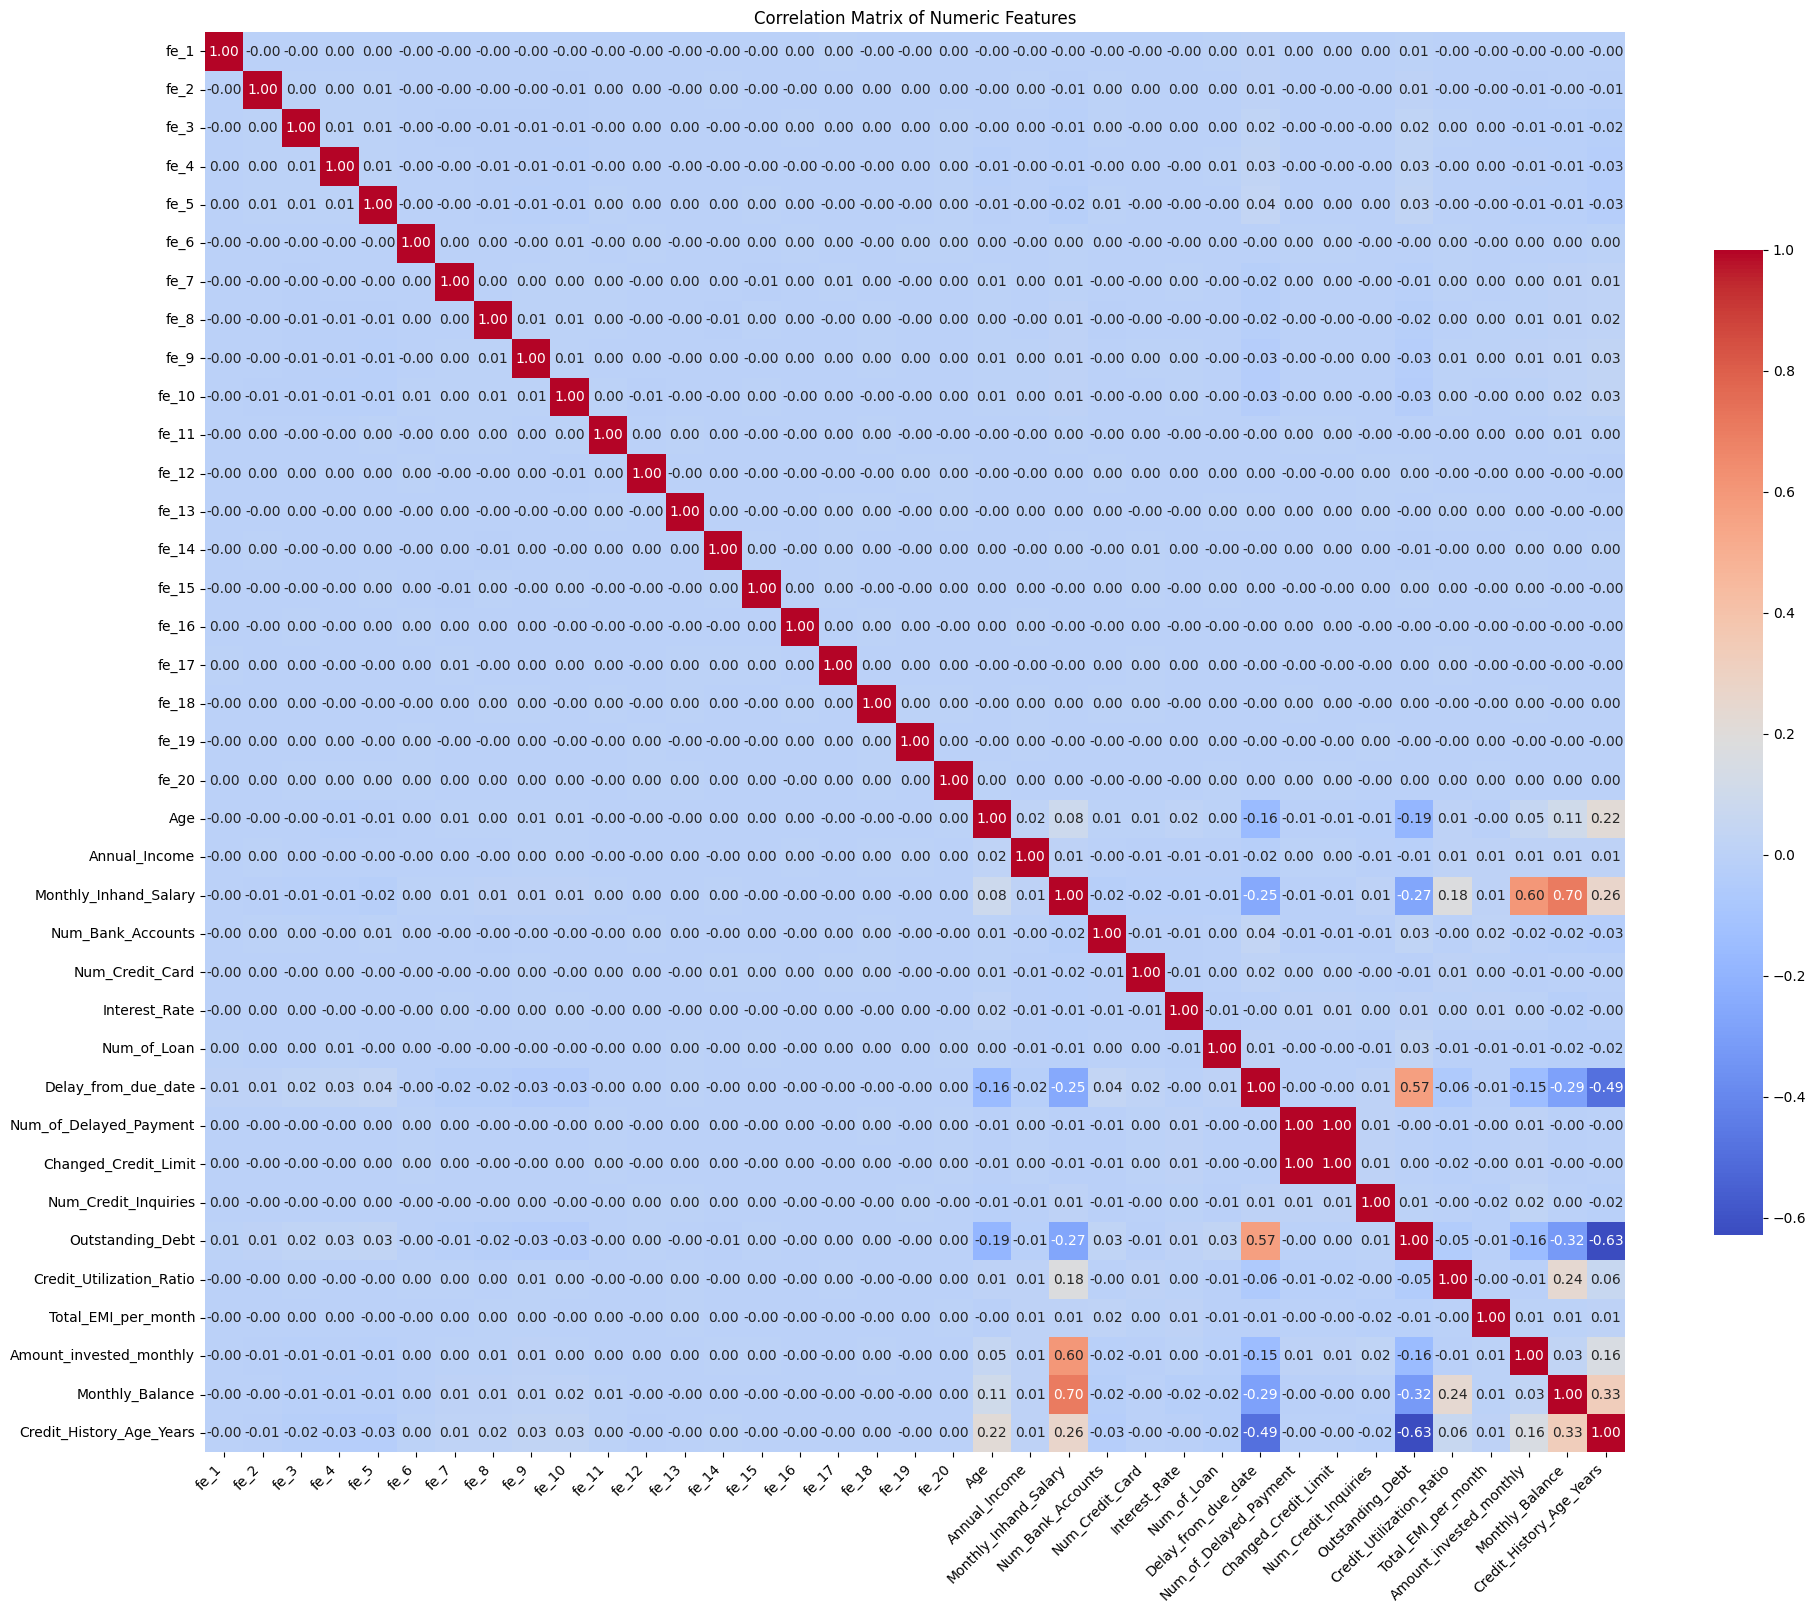

In [67]:
df_numeric_pd = df_numeric.toPandas()


corr_matrix = df_numeric_pd.corr()

# Step 3: Plot
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .5})
plt.title("Correlation Matrix of Numeric Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


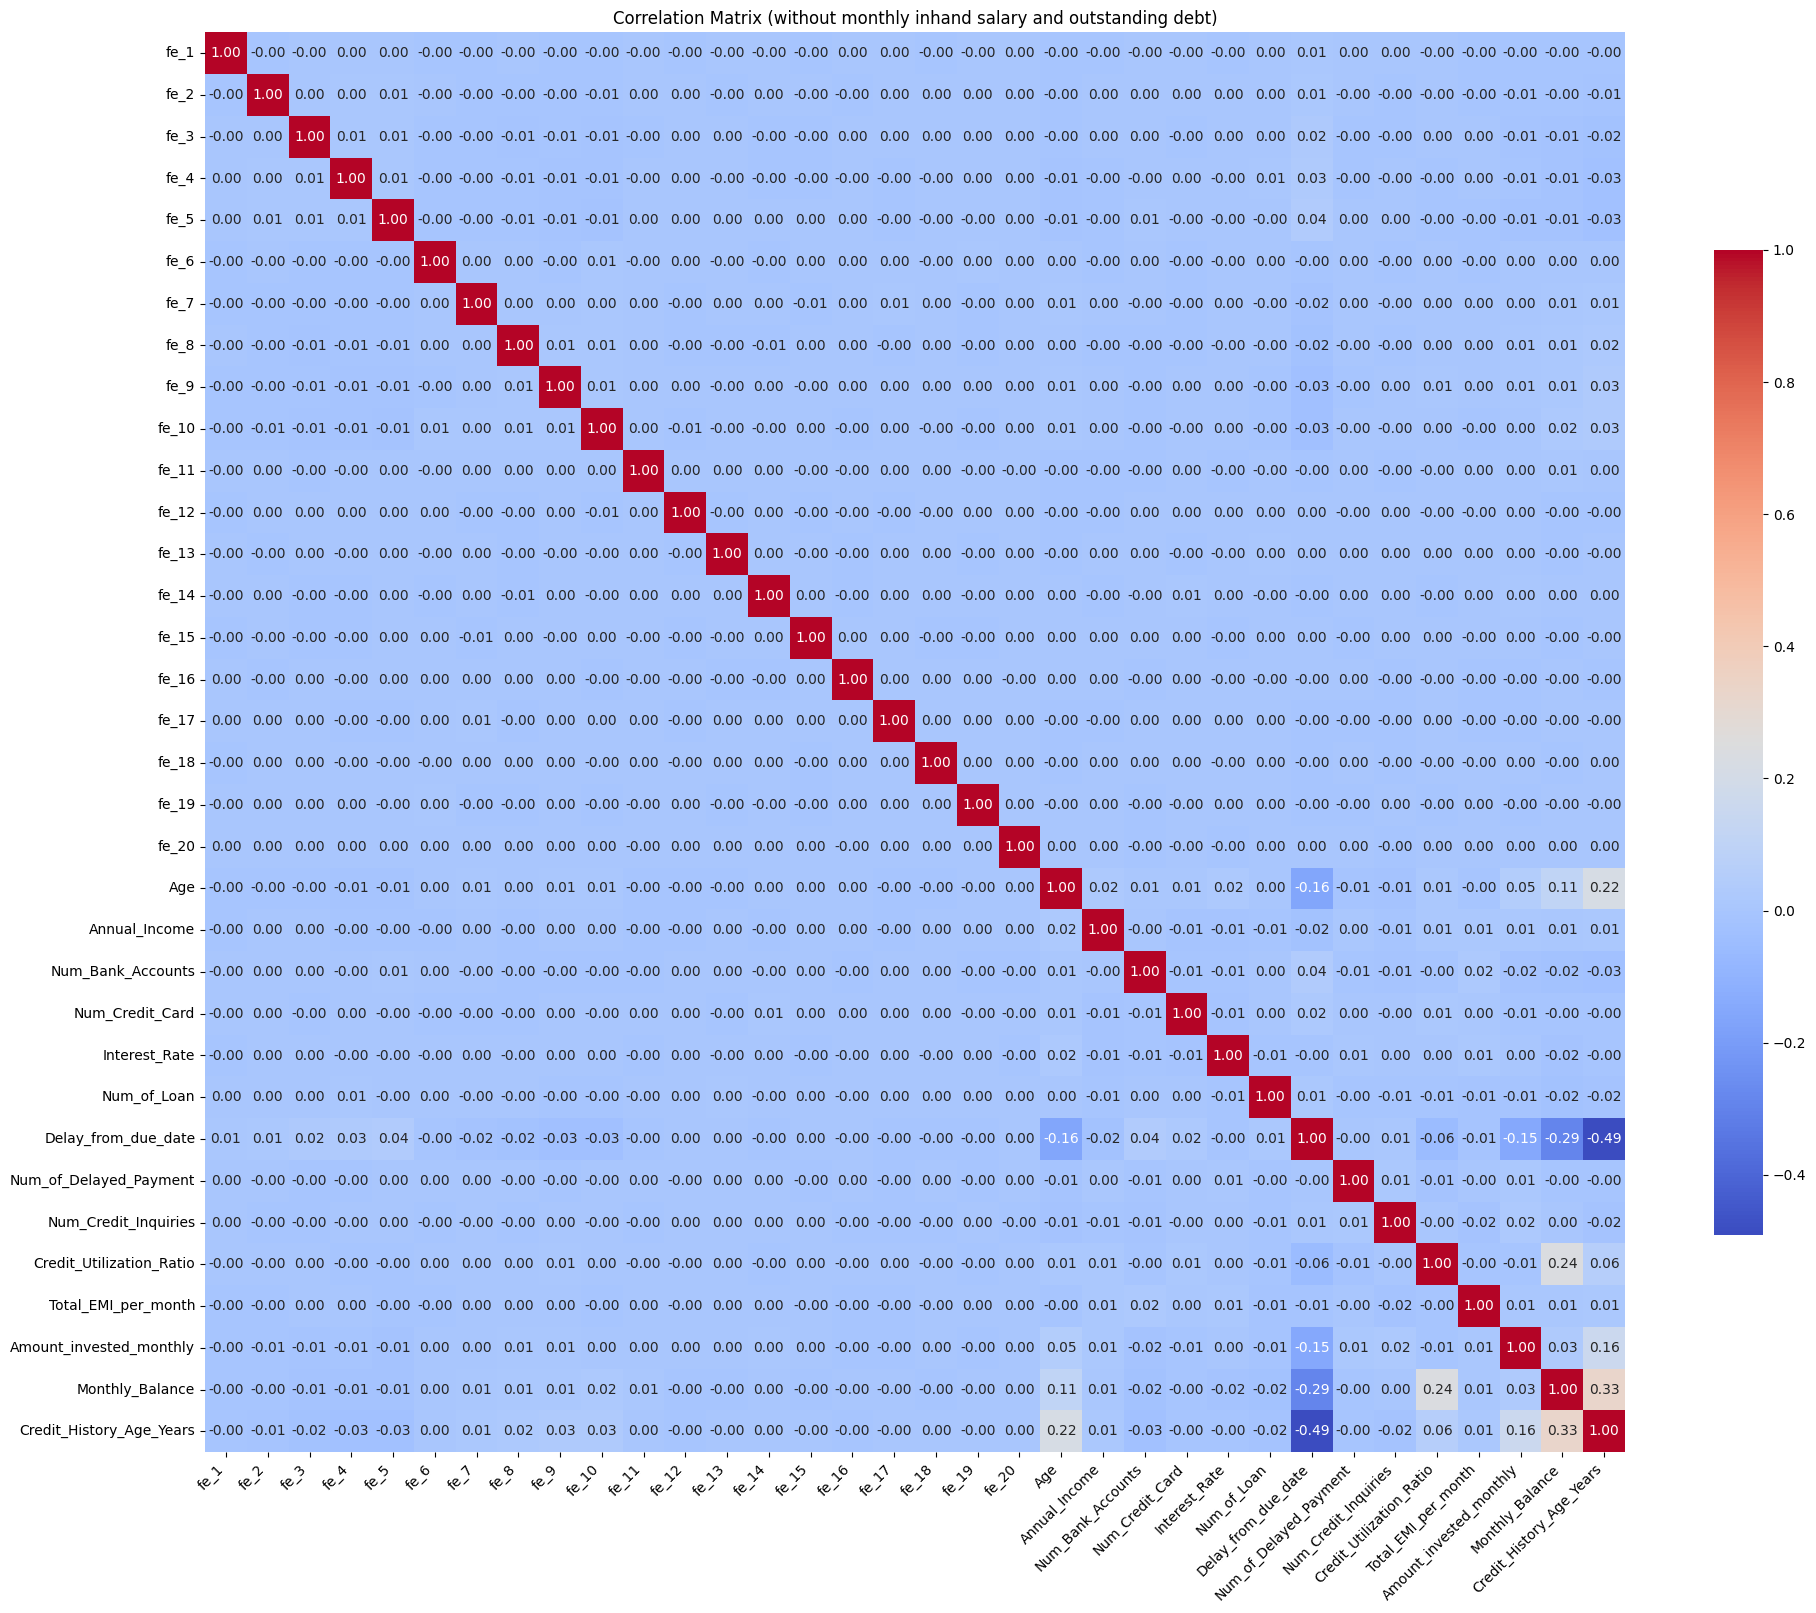

In [68]:
# Drop highly correlated 
df_numeric = df_numeric.drop('Monthly_Inhand_Salary', 'Outstanding_Debt',"Changed_Credit_Limit")

# Then convert to Pandas and plot
df_numeric_pd = df_numeric.toPandas()



corr_matrix = df_numeric_pd.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .5})
plt.title("Correlation Matrix (without monthly inhand salary and outstanding debt)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [69]:
from pyspark.sql.types import StringType

# Get all string (categorical) columns
categorical_columns = [field.name for field in gold_table_df.schema.fields if isinstance(field.dataType, StringType) and field.name != "Customer_ID"]
df_cat = gold_table_df.select(categorical_columns).toPandas()

print("Categorical columns:", categorical_columns)

print(df_cat.head(5))


Categorical columns: ['occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
     occupation Credit_Mix Payment_of_Min_Amount  \
0    Journalist   Standard                   Yes   
1  Entrepreneur        Bad                   Yes   
2      Engineer   Standard                    NM   
3     Architect    Unknown                   Yes   
4    Accountant        Bad                   Yes   

                 Payment_Behaviour  
0   Low_spent_Small_value_payments  
1  High_spent_Small_value_payments  
2   Low_spent_Small_value_payments  
3  High_spent_Small_value_payments  
4                          Unknown  


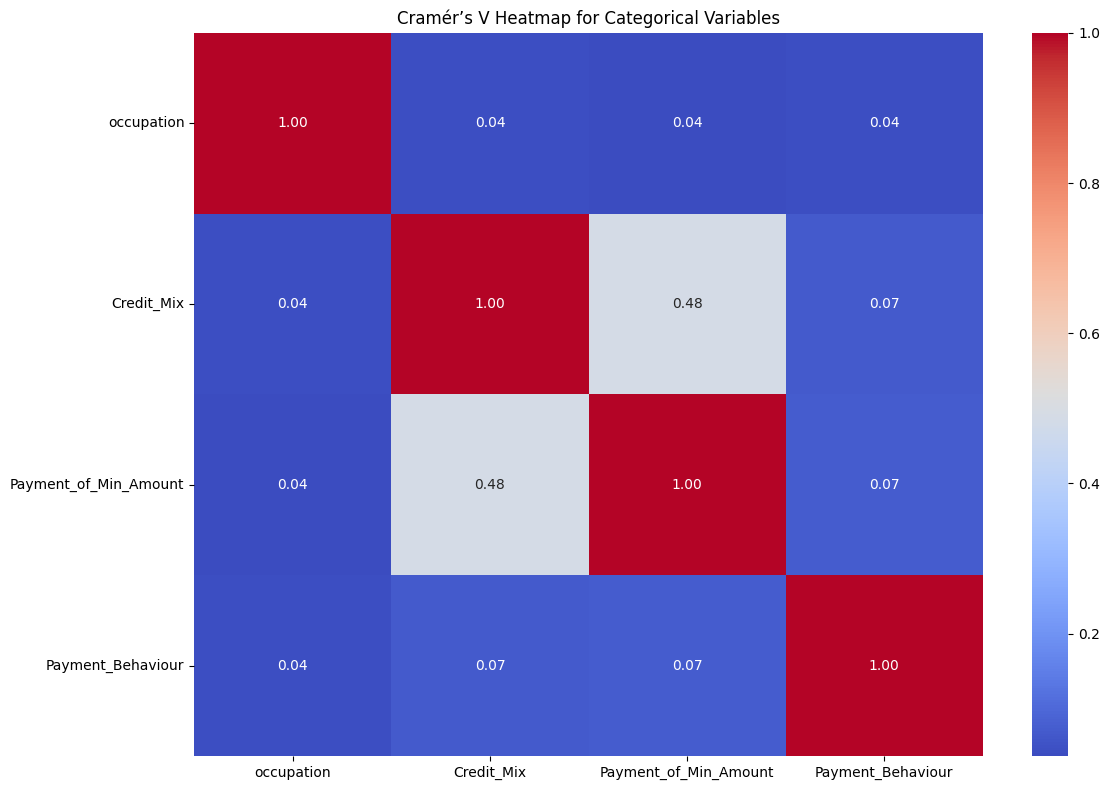

In [70]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (__builtins__.min(r, k) - 1))) if __builtins__.min(r, k) > 1 else np.nan

# Calculate pairwise Cramér’s V
cramers_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v(df_cat[col1], df_cat[col2])

# Convert to float
cramers_results = cramers_results.astype(float)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_results, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cramér’s V Heatmap for Categorical Variables")
plt.tight_layout()
plt.show()

### Dropping high correlated data

In [71]:
# Drop the specified columns from gold_table_df
gold_table_df = gold_table_df.drop("Monthly_Inhand_Salary", "Outstanding_Debt")

# Verify the schema to ensure the columns are dropped
gold_table_df.printSchema()

root
 |-- Customer_ID: string (nullable = true)
 |-- fe_1: double (nullable = true)
 |-- fe_2: double (nullable = true)
 |-- fe_3: double (nullable = true)
 |-- fe_4: double (nullable = true)
 |-- fe_5: double (nullable = true)
 |-- fe_6: double (nullable = true)
 |-- fe_7: double (nullable = true)
 |-- fe_8: double (nullable = true)
 |-- fe_9: double (nullable = true)
 |-- fe_10: double (nullable = true)
 |-- fe_11: double (nullable = true)
 |-- fe_12: double (nullable = true)
 |-- fe_13: double (nullable = true)
 |-- fe_14: double (nullable = true)
 |-- fe_15: double (nullable = true)
 |-- fe_16: double (nullable = true)
 |-- fe_17: double (nullable = true)
 |-- fe_18: double (nullable = true)
 |-- fe_19: double (nullable = true)
 |-- fe_20: double (nullable = true)
 |-- clickstream_snapshot_date: date (nullable = true)
 |-- Age: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- attributes_snapshot_date: date (nullable = true)
 |-- Annual_Income: integer (nulla

### One hot encoding

In [72]:
from pyspark.sql.functions import col, when, collect_list, collect_set, lit

# Dynamically extract unique classes for Payment_Behaviour
payment_behaviour_classes = gold_table_df.select("Payment_Behaviour").distinct().rdd.flatMap(lambda x: x).collect()

# One-hot encode Payment_Behaviour
for category in payment_behaviour_classes:
    gold_table_df = gold_table_df.withColumn(
        f"Payment_Behaviour_{category.replace(' ', '_')}",
        when(col("Payment_Behaviour") == category, 1).otherwise(0)
    )

# Drop the original Payment_Behaviour column if no longer needed
gold_table_df = gold_table_df.drop("Payment_Behaviour")

# Dynamically extract unique classes for Credit_Mix
credit_mix_classes = gold_table_df.select("Credit_Mix").distinct().rdd.flatMap(lambda x: x).collect()

# One-hot encode Credit_Mix
for category in credit_mix_classes:
    gold_table_df = gold_table_df.withColumn(
        f"Credit_Mix_{category.replace(' ', '_')}",
        when(col("Credit_Mix") == category, 1).otherwise(0)
    )

# Drop the original Credit_Mix column if no longer needed
gold_table_df = gold_table_df.drop("Credit_Mix")

# Show the resulting DataFrame
gold_table_df.show(5)

+-----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------------+---+------------+------------------------+-------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+--------------------+------------------------+---------------------+-------------------+-----------------------+---------------+-----------------------+--------------------+------------------------+------------------------------------------------+--------------------------------------------------+-------------------------+-------------------------------------------------+-

In [73]:
# Step 1: Explode the array to get all unique loan types
unique_loan_types = (
    gold_table_df
    .select(explode(col("Type_of_Loan_Array")).alias("Loan_Type"))
    .distinct()
    .rdd.flatMap(lambda x: x)
    .collect()
)

# Step 2: Create one-hot encoded columns for each unique loan type
for loan_type in unique_loan_types:
    gold_table_df = gold_table_df.withColumn(
        f"Loan_{loan_type.replace(' ', '_')}",
        when(array_contains(col("Type_of_Loan_Array"), loan_type), 1).otherwise(0)
    )

# Step 3: Drop the original Type_of_Loan_Array column if no longer needed
gold_table_df = gold_table_df.drop("Type_of_Loan_Array", "Type_Of_Loan")

gold_table_pd = gold_table_df.toPandas()

# Show the resulting DataFrame
gold_table_pd.head(5)

,Customer_ID,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,fe_7,fe_8,fe_9,...,Credit_Mix_Standard,Loan_Home_Equity_Loan,Loan_Payday_Loan,Loan_Personal_Loan,Loan_Debt_Consolidation_Loan,Loan_Mortgage_Loan,Loan_Student_Loan,Loan_Credit-Builder_Loan,Loan_Auto_Loan,Loan_Not_Specified
0,CUS_0xe60,-0.541069,-0.314669,-0.513691,-0.532692,-0.062287,0.101463,0.447437,1.216110,1.125558,...,1,0,0,0,0,0,0,1,1,0
1,CUS_0xeb0,0.622008,-0.374486,-1.357476,0.363110,0.512917,0.171483,1.226765,1.026581,1.165519,...,0,0,0,1,1,0,0,1,1,1
2,CUS_0xebd,-0.651361,-0.603784,0.081922,-0.721805,-0.131708,0.281516,0.537359,0.657497,1.105577,...,1,0,1,1,1,0,1,0,0,0
3,CUS_0xf2e,1.684820,-0.613753,0.737096,0.611944,-0.776332,-1.699065,-0.032150,1.635071,-0.193179,...,0,1,0,0,1,0,0,1,1,1
4,CUS_0xf5d,1.474262,0.203745,-0.414422,0.383016,0.552586,-0.368675,0.527368,-0.898641,-0.462921,...,0,1,1,1,0,1,0,0,0,1


##### Payment of min amount

In [74]:
gold_table_df.select("Payment_of_Min_Amount").distinct().show(truncate=False)

[Stage 1105:===================================================>  (19 + 1) / 20]

+---------------------+
|Payment_of_Min_Amount|
+---------------------+
|NM                   |
|No                   |
|Yes                  |
+---------------------+



In [75]:

payment_min_amount_classes = gold_table_df.select("Payment_of_Min_Amount").distinct().rdd.flatMap(lambda x: x).collect()

# One-hot encode Payment_of_Min_Amount
for category in payment_min_amount_classes:
    gold_table_df = gold_table_df.withColumn(
        f"Payment_of_Min_Amount_{category}",
        when(col("Payment_of_Min_Amount") == category, 1).otherwise(0)
    )

# Drop the original Payment_of_Min_Amount column if no longer needed
gold_table_df = gold_table_df.drop("Payment_of_Min_Amount")

# Show the resulting DataFrame
gold_table_pd = gold_table_df.toPandas()

# Show the resulting DataFrame
gold_table_pd.head(5)

,Customer_ID,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,fe_7,fe_8,fe_9,...,Loan_Personal_Loan,Loan_Debt_Consolidation_Loan,Loan_Mortgage_Loan,Loan_Student_Loan,Loan_Credit-Builder_Loan,Loan_Auto_Loan,Loan_Not_Specified,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,CUS_0xe60,-0.541069,-0.314669,-0.513691,-0.532692,-0.062287,0.101463,0.447437,1.216110,1.125558,...,0,0,0,0,1,1,0,0,0,1
1,CUS_0xeb0,0.622008,-0.374486,-1.357476,0.363110,0.512917,0.171483,1.226765,1.026581,1.165519,...,1,1,0,0,1,1,1,0,0,1
2,CUS_0xebd,-0.651361,-0.603784,0.081922,-0.721805,-0.131708,0.281516,0.537359,0.657497,1.105577,...,1,1,0,1,0,0,0,1,0,0
3,CUS_0xf2e,1.684820,-0.613753,0.737096,0.611944,-0.776332,-1.699065,-0.032150,1.635071,-0.193179,...,0,1,0,0,1,1,1,0,0,1
4,CUS_0xf5d,1.474262,0.203745,-0.414422,0.383016,0.552586,-0.368675,0.527368,-0.898641,-0.462921,...,1,0,1,0,0,0,1,0,0,1


##### Occupation

In [76]:
from pyspark.sql.functions import col, when


occupation_classes = gold_table_df.select("occupation").distinct().rdd.flatMap(lambda x: x).collect()

# One-hot encode occupation
for category in occupation_classes:
    gold_table_df = gold_table_df.withColumn(
        f"occupation_{category.replace(' ', '_')}",
        when(col("occupation") == category, 1).otherwise(0)
    )

# Drop the original occupation column
gold_table_df = gold_table_df.drop("occupation")

# Show the resulting DataFrame
gold_table_pd = gold_table_df.toPandas()


gold_table_pd.head(5)

,Customer_ID,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,fe_7,fe_8,fe_9,...,occupation_Developer,occupation_Writer,occupation_Architect,occupation_Mechanic,occupation_Entrepreneur,occupation_Journalist,occupation_Doctor,occupation_Engineer,occupation_Accountant,occupation_Manager
0,CUS_0xe60,-0.541069,-0.314669,-0.513691,-0.532692,-0.062287,0.101463,0.447437,1.216110,1.125558,...,0,0,0,0,0,1,0,0,0,0
1,CUS_0xeb0,0.622008,-0.374486,-1.357476,0.363110,0.512917,0.171483,1.226765,1.026581,1.165519,...,0,0,0,0,1,0,0,0,0,0
2,CUS_0xebd,-0.651361,-0.603784,0.081922,-0.721805,-0.131708,0.281516,0.537359,0.657497,1.105577,...,0,0,0,0,0,0,0,1,0,0
3,CUS_0xf2e,1.684820,-0.613753,0.737096,0.611944,-0.776332,-1.699065,-0.032150,1.635071,-0.193179,...,0,0,1,0,0,0,0,0,0,0
4,CUS_0xf5d,1.474262,0.203745,-0.414422,0.383016,0.552586,-0.368675,0.527368,-0.898641,-0.462921,...,0,0,0,0,0,0,0,0,1,0


In [77]:
gold_table_df.printSchema()

root
 |-- Customer_ID: string (nullable = true)
 |-- fe_1: double (nullable = true)
 |-- fe_2: double (nullable = true)
 |-- fe_3: double (nullable = true)
 |-- fe_4: double (nullable = true)
 |-- fe_5: double (nullable = true)
 |-- fe_6: double (nullable = true)
 |-- fe_7: double (nullable = true)
 |-- fe_8: double (nullable = true)
 |-- fe_9: double (nullable = true)
 |-- fe_10: double (nullable = true)
 |-- fe_11: double (nullable = true)
 |-- fe_12: double (nullable = true)
 |-- fe_13: double (nullable = true)
 |-- fe_14: double (nullable = true)
 |-- fe_15: double (nullable = true)
 |-- fe_16: double (nullable = true)
 |-- fe_17: double (nullable = true)
 |-- fe_18: double (nullable = true)
 |-- fe_19: double (nullable = true)
 |-- fe_20: double (nullable = true)
 |-- clickstream_snapshot_date: date (nullable = true)
 |-- Age: integer (nullable = true)
 |-- attributes_snapshot_date: date (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Num_Bank_Accounts: intege

In [78]:
print(gold_table_pd.dtypes)

Customer_ID               object
fe_1                     float64
fe_2                     float64
fe_3                     float64
fe_4                     float64
                          ...   
occupation_Journalist      int32
occupation_Doctor          int32
occupation_Engineer        int32
occupation_Accountant      int32
occupation_Manager         int32
Length: 77, dtype: object


##### Preprocessing using pyspark

In [12]:
####

# Define directories for the gold table
gold_table_directory = "datamart/gold/feature_store/"
silver_clickstream_directory = "datamart/silver/clickstream/"
silver_attributes_directory = "datamart/silver/feat_attributes/"
silver_financial_directory = "datamart/silver/feat_financial/"

# Ensure the gold table directory exists
if not os.path.exists(gold_table_directory):
    os.makedirs(gold_table_directory)

# Process the gold table for each date in the list
for date_str in dates_str_lst:
    utils.data_processing_gold_table.process_gold_table(
        date_str,
        silver_clickstream_directory,
        silver_attributes_directory,
        silver_financial_directory,
        gold_table_directory,
        spark
    )

Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_01_01.parquet, Row count: 8974
Error reading Attributes data: [UNABLE_TO_INFER_SCHEMA] Unable to infer schema for Parquet. It must be specified manually.
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_02_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_02_01.parquet, Row count: 501
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_02_01.parquet, Row count: 501


Gold table saved to: datamart/gold/feature_store/gold_table_2023_02_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_03_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_03_01.parquet, Row count: 506
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_03_01.parquet, Row count: 506


Gold table saved to: datamart/gold/feature_store/gold_table_2023_03_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_04_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_04_01.parquet, Row count: 510
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_04_01.parquet, Row count: 510


Gold table saved to: datamart/gold/feature_store/gold_table_2023_04_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_05_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_05_01.parquet, Row count: 521
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_05_01.parquet, Row count: 521


Gold table saved to: datamart/gold/feature_store/gold_table_2023_05_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_06_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_06_01.parquet, Row count: 517
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_06_01.parquet, Row count: 517


Gold table saved to: datamart/gold/feature_store/gold_table_2023_06_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_07_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_07_01.parquet, Row count: 471
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_07_01.parquet, Row count: 471


Gold table saved to: datamart/gold/feature_store/gold_table_2023_07_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_08_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_08_01.parquet, Row count: 481
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_08_01.parquet, Row count: 481


Gold table saved to: datamart/gold/feature_store/gold_table_2023_08_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_09_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_09_01.parquet, Row count: 454
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_09_01.parquet, Row count: 454


Gold table saved to: datamart/gold/feature_store/gold_table_2023_09_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_10_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_10_01.parquet, Row count: 487
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_10_01.parquet, Row count: 487


Gold table saved to: datamart/gold/feature_store/gold_table_2023_10_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_11_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_11_01.parquet, Row count: 491
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_11_01.parquet, Row count: 491


Gold table saved to: datamart/gold/feature_store/gold_table_2023_11_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2023_12_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2023_12_01.parquet, Row count: 489
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2023_12_01.parquet, Row count: 489


Gold table saved to: datamart/gold/feature_store/gold_table_2023_12_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_01_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_01_01.parquet, Row count: 485
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_01_01.parquet, Row count: 485


Gold table saved to: datamart/gold/feature_store/gold_table_2024_01_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_02_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_02_01.parquet, Row count: 518
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_02_01.parquet, Row count: 518


Gold table saved to: datamart/gold/feature_store/gold_table_2024_02_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_03_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_03_01.parquet, Row count: 511
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_03_01.parquet, Row count: 511


Gold table saved to: datamart/gold/feature_store/gold_table_2024_03_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_04_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_04_01.parquet, Row count: 513
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_04_01.parquet, Row count: 513


Gold table saved to: datamart/gold/feature_store/gold_table_2024_04_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_05_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_05_01.parquet, Row count: 491
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_05_01.parquet, Row count: 491


Gold table saved to: datamart/gold/feature_store/gold_table_2024_05_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_06_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_06_01.parquet, Row count: 498
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_06_01.parquet, Row count: 498


Gold table saved to: datamart/gold/feature_store/gold_table_2024_06_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_07_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_07_01.parquet, Row count: 505
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_07_01.parquet, Row count: 505


Gold table saved to: datamart/gold/feature_store/gold_table_2024_07_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_08_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_08_01.parquet, Row count: 543
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_08_01.parquet, Row count: 543


Gold table saved to: datamart/gold/feature_store/gold_table_2024_08_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_09_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_09_01.parquet, Row count: 493
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_09_01.parquet, Row count: 493


Gold table saved to: datamart/gold/feature_store/gold_table_2024_09_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_10_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_10_01.parquet, Row count: 456
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_10_01.parquet, Row count: 456


Gold table saved to: datamart/gold/feature_store/gold_table_2024_10_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_11_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_11_01.parquet, Row count: 488
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_11_01.parquet, Row count: 488


Gold table saved to: datamart/gold/feature_store/gold_table_2024_11_01.parquet
Loaded Clickstream data from: datamart/silver/clickstream/silver_feat_clickstream_2024_12_01.parquet, Row count: 8974
Loaded Attributes data from: datamart/silver/feat_attributes/silver_feat_attribute_2024_12_01.parquet, Row count: 515
Loaded Financial data from: datamart/silver/feat_financial/silver_feat_financial_2024_12_01.parquet, Row count: 515


Gold table saved to: datamart/gold/feature_store/gold_table_2024_12_01.parquet


In [6]:
# Define the directory where the gold table is stored
gold_table_directory = "datamart/gold/feature_store/"

def load_gold_table(directory, spark):
    # Find all Parquet files
    parquet_files = glob.glob(os.path.join(directory, "*.parquet"))
    if not parquet_files:
        print(f"No Parquet files found in {directory}. Skipping.")
        return None
    
    print(f"Reading {len(parquet_files)} files from {directory}")
    # Read the actual files
    return spark.read.option("mergeSchema", "true").parquet(*parquet_files)

# Load the gold table using the load_silver_table function
gold_table_df = load_gold_table(gold_table_directory, spark)

# Check if the table was loaded successfully
if gold_table_df:
    # Show the schema of the gold table
    gold_table_df.printSchema()

    # Display the first few rows of the gold table
    gold_table_df.show(10, truncate=False)

else:
    print("Gold table could not be loaded.")




Reading 24 files from datamart/gold/feature_store/


root
 |-- Customer_ID: string (nullable = true)
 |-- fe_1: double (nullable = true)
 |-- fe_2: double (nullable = true)
 |-- fe_3: double (nullable = true)
 |-- fe_4: double (nullable = true)
 |-- fe_5: double (nullable = true)
 |-- fe_6: double (nullable = true)
 |-- fe_7: double (nullable = true)
 |-- fe_8: double (nullable = true)
 |-- fe_9: double (nullable = true)
 |-- fe_10: double (nullable = true)
 |-- fe_11: double (nullable = true)
 |-- fe_12: double (nullable = true)
 |-- fe_13: double (nullable = true)
 |-- fe_14: double (nullable = true)
 |-- fe_15: double (nullable = true)
 |-- fe_16: double (nullable = true)
 |-- fe_17: double (nullable = true)
 |-- fe_18: double (nullable = true)
 |-- fe_19: double (nullable = true)
 |-- fe_20: double (nullable = true)
 |-- clickstream_snapshot_date: date (nullable = true)
 |-- Age: integer (nullable = true)
 |-- attributes_snapshot_date: date (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Num_Bank_Accounts: intege

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+---------------------+--------------------+--------------------+---------------------+--------------------+--------------------+---------------------+-------------------------+---+------------------------+-------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+----------+------------------------+-------------------+-----------------------+--------------------------------+---------------+-----------------------+-----------------------------------------------------------------------+------------------------+-------------+------------------------+------------------------+-------------------------+--------------------+------------

Row count: 8974
